## <center> **SafeCity: Understanding Diverse Forms of Sexual Harassment Personal Stories** </center>

#### <center> Exploratory Data Analaysis </center>
#### <center> Feature Engineering </center>
#### <center> Hyper-parameter Tunning </center>
#### <center> Model Training </center>
#### <center> Performance Metric </center>

**Note:** This notebook contains the training of only the best model

**Reference Paper link:** [SafeCity: Understanding Diverse Forms of Sexual Harassment
Personal Stories
](https://arxiv.org/pdf/1809.04739v2.pdf)


 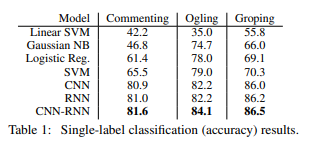

**Pre-processing and Feature Engineering performed**

**1.** converted text to lower case

**2.** expand contractions

**3.** removed all characters except alphabets and numbers

**4.** removed stop-words

**5.** lemmatization

**6.** Tagging parts of speech

**7.** Number of words present in the description

**8.** TF-IDF vectorization with ngrams(1,4)

**9.** TF-IDF W2V (300 dim) <br> <br>

**Why TFIDF(1,4) and TFIDF W2V was used?**

* TF-IDF vectorization with ngrams(1,4), was used as this combination of ngrams was giving better results than other combinations

* TF-IDF W2V helped in increasing performance and reducing overfitting.

### <font color = green> **Importing Packages** </font>

In [1]:
!pip install contractions

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


     |████████████████████████████████| 321 kB 5.2 MB/s 
     |████████████████████████████████| 284 kB 48.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=af68bc0b1b0b5217ad20a4ca5547e49b7697e7506527063867cf7cc400b61714
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from textblob import TextBlob

import contractions


import pickle

from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import re


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob 

import re
from collections import Counter
import gensim
import heapq
from operator import itemgetter
from multiprocessing import Pool

from wordcloud import WordCloud


from scipy.sparse import hstack

import spacy
  
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, f1_score

### <font color = green> **Mounting Drive** </font>

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


### <font color = green> **Imbalance in Datasets** </font>

Ogling > Groping > Commenting

### <font color = green> **Commenting Dataset** </font>
<font color = red> **Results** </font>

**Metrics used in paper:** Accuracy <br>
> **Train score:** 78% <br>
> **Test score:** 79%

**F1 score**
> **Train score:** 0.651 <br>
> **Test score:** 0.654

In [77]:
commenting_train = pd.read_csv("/content/drive/MyDrive/Datasets/commenting/train.csv")
commenting_test = pd.read_csv("/content/drive/MyDrive/Datasets/commenting/test.csv")

In [6]:
print("Shape of train :" , commenting_train.shape)
print("Shape of test :" , commenting_test.shape)

Shape of train : (7201, 2)
Shape of test : (1701, 2)


In [7]:
#train data
commenting_train.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",0
1,This incident took place in the evening.I was ...,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [8]:
#test data
commenting_test.head()

,Description,Category
0,"During morning, a woman was walking by and thi...",1
1,A man tried to brush his penis off of a woman'...,0
2,This happened to a fellow passenger of mine tr...,0
3,ogling,0
4,When I was returning my home after finishing m...,0


#### **Exploratory Data Analysis**

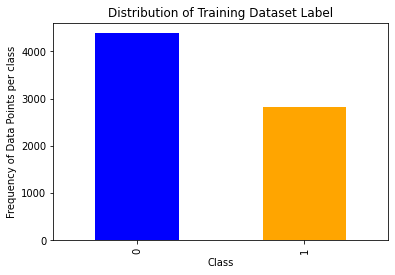

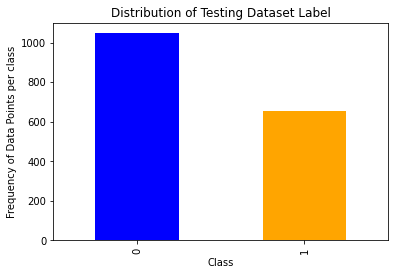

In [9]:
#checking the distribution of the data in train,cv and test

#counting number of points per class in train set
train_dist = commenting_train.Category.value_counts()



#counting number of points per class in test set
test_dist = commenting_test.Category.value_counts()


#plotting the number of points per class in train set
train_dist.plot( kind = "bar" , color = ["blue" , "orange"])
plt.title("Distribution of Training Dataset Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")

plt.show()



#plotting the number of points per class in test set
test_dist.plot( kind = "bar" , color = ["blue" , "orange"])
plt.title("Distribution of Testing Dataset Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")

plt.show()

<font color = red> **Interpretation** </font>
> The distribution of data in the train and test set is similar. Hence ML models can be used to make predictions

Number of data points per class : 
  0    4381
1    2820
Name: Category, dtype: int64


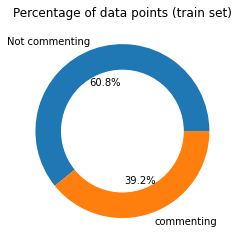

In [10]:
#https://www.python-graph-gallery.com/donut-plot/
#https://pythonspot.com/matplotlib-pie-chart/

#checking for class imbalance 
print("Number of data points per class : \n ", commenting_train.Category.value_counts() )

# create data
size_of_groups=[commenting_train.Category.value_counts()[0] , commenting_train.Category.value_counts()[1]]

#labels
label = ["Not commenting" , "commenting" ]

# Create a pieplot
plt.pie(size_of_groups , autopct='%1.1f%%' , labels=label)

#tiltle
plt.title("Percentage of data points (train set)")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<font color = red> **Interpretation** </font>
> The dataset is imblanced. It needs to be balanced before model training

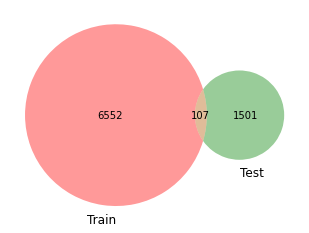

In [11]:
#checking number of data points common in train and test set

#https://stackoverflow.com/questions/37725099/plot-venn-diagram-with-pandas-and-matplotlib-venn

set1 = set(commenting_train.Description)
set2 = set(commenting_test.Description)

set_array = []

set_array.append(set1)
set_array.append(set2)

venn2([set1, set2], ('Train', 'Test')) # venn2 works for two sets

plt.show()

<font color = red> **Interpretation** </font>
> There is only a small fraction of overlap of data between train and test dataset. The test dataset is a good to check how well the model works on unseen data

Number of duplicated entries in train dataset :  497


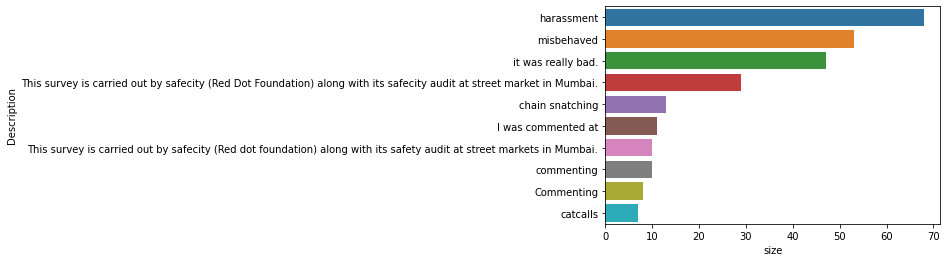

In [12]:
train_duplicate = commenting_train[commenting_train.duplicated()]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['Description'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  161


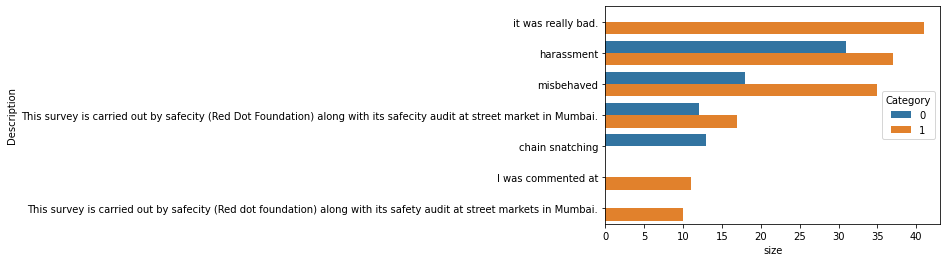

In [13]:
train_dup_count_class = train_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['Description'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : commenting and Commenting. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

Number of duplicated entries in test dataset :  85


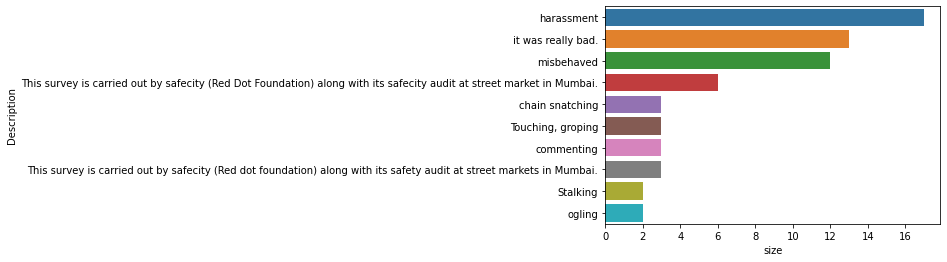

In [14]:
test_duplicate = commenting_test[commenting_test.duplicated()]
print("Number of duplicated entries in test dataset : ", len(test_duplicate))

test_dup_count = test_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)

sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['Description'][:10])

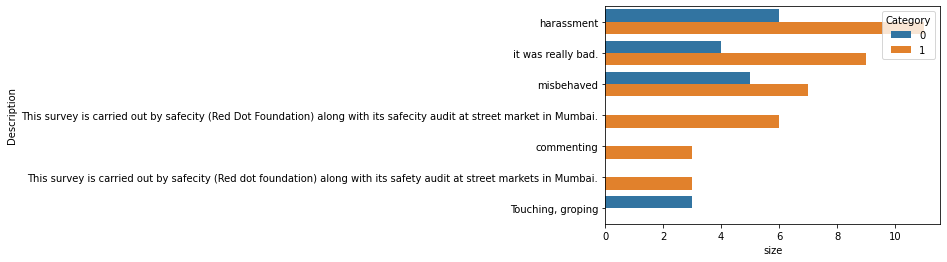

In [15]:
test_dup_count_class = test_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['Description'][:10] , hue = test_dup_count_class['Category'][:10])

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : commenting and Commenting. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

#### **Feature Engineering**

In [78]:
#lower case
def to_lower(x):
  return x.lower()

In [79]:
commenting_train['lower'] = commenting_train['Description'].apply(to_lower)
commenting_test['lower'] = commenting_test['Description'].apply(to_lower)

#displaying train dataset
commenting_train.head()

,Description,Category,lower
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums..."
1,This incident took place in the evening.I was ...,0,this incident took place in the evening.i was ...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,i was waiting for the bus. a man came on a bik...
3,Incident happened inside the train,0,incident happened inside the train
4,I witnessed an incident when a chain was bruta...,0,i witnessed an incident when a chain was bruta...


In [80]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
"'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had",
"he'd've": "he would have", "he'll": "he shall", "he'll've": "he shall have", "he's": "he has",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has",
"I'd": "I had", "I'd've": "I would have", "I'll": "I shall", "I'll've": "I shall have",
"I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it shall", "it'll've": "it shall have", "it's": "it has",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
"mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
"shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she shall",
"she'll've": "she shall have", "she's": "she has", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would",
"that'd've": "that would have", "that's": "that has", "there'd": "there had", "there'd've": "there would have",
"there's": "there has", "they'd": "they had", "they'd've": "they would have", "they'll": "they shall",
"they'll've": "they shall have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we had", "we'd've": "we would have", "we'll": "we will",
"we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what shall", "what'll've": "what shall have", "what're": "what are", "what's": "what has",
"what've": "what have", "when's": "when has", "when've": "when have", "where'd": "where did",
"where's": "where has", "where've": "where have", "who'll": "who shall", "who'll've": "who shall have",
"who's": "who has", "who've": "who have", "why's": "why has", "why've": "why have",
"will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
"you'd": "you had", "you'd've": "you would have", "you'll": "you shall", "you'll've": "you shall have",
"you're": "you are", "you've": "you have"
}

In [81]:
#expand contractions

def expand_con(x):
  expanded = []
  words = x.split(" ")
  for index, word in enumerate(words) :
    if word in contractions:
      words[index] = contractions[word]
    

  return  ' '.join(words)

In [82]:
commenting_train['expand'] = commenting_train['lower'].apply(expand_con)
commenting_test['expand'] = commenting_test['lower'].apply(expand_con)

#displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums..."


In [83]:
#removing all characters except alphanumeric 

def clean_text(x):
    pattern = r'[^a-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

In [84]:
commenting_train['clean_text'] = commenting_train['expand'].apply(clean_text)
commenting_test['clean_text'] = commenting_test['expand'].apply(clean_text)

#displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand,clean_text
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...


In [85]:
#adding space between a number and character
#40yers - 40 yrs
#3pm - 3 pm

def split_num_alpha(x):
  regex = r"(?i)(?<=\d)(?=[a-z])|(?<=[a-z])(?=\d)"
  text = re.sub(regex, " ", x, 0)
  if text:
      return text
  else:
      return x

In [86]:
commenting_train['split_num_alpha'] = commenting_train['clean_text'].apply(split_num_alpha)
commenting_test['split_num_alpha'] = commenting_test['clean_text'].apply(split_num_alpha)

#displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...


In [87]:
#removing stop words

# set of stop words
stop_words = set(stopwords.words('english')) 

def remove_stop_words(x): 
  # tokens of words  
  word_tokens = word_tokenize(x) 
    
  filtered_sentence = [] 
  
  for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

  return " ".join(filtered_sentence)


In [88]:
commenting_train['remove_stop_words'] = commenting_train['split_num_alpha'].apply(remove_stop_words)
commenting_test['remove_stop_words'] = commenting_test['split_num_alpha'].apply(remove_stop_words)

#displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...


In [89]:
def lem(x):

  lem_l = []

  doc = nlp(x)
  for token in doc:
    tl = token.lemma_
    if tl == '-PRON-':
      continue
    else:
      lem_l.append(tl)
  
  lem_sen = ' '.join([i for i in lem_l]) 

  return lem_sen


In [90]:
commenting_train['lem'] = commenting_train['remove_stop_words'].apply(lem)
commenting_test['lem'] = commenting_test['remove_stop_words'].apply(lem)

In [40]:
commenting_train.head(2)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...
1,This incident took place in the evening.I was ...,0,this incident took place in the evening.i was ...,this incident took place in the evening.i was ...,this incident took place in the eveningi was i...,this incident took place in the eveningi was i...,incident took place eveningi metro two guys st...,incident take place eveningi metro two guy sta...


Number of duplicated entries in train dataset :  692


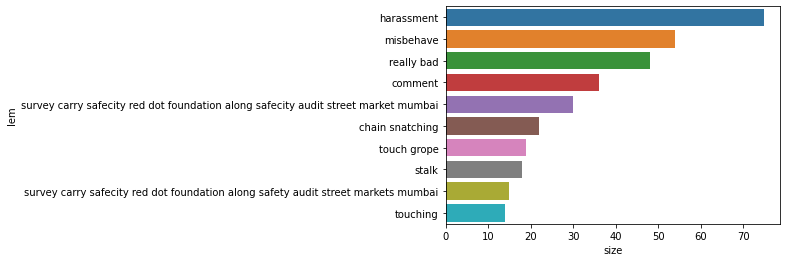

In [41]:
#displaying the duplicate entries after pre-processing

train_duplicate = commenting_train[commenting_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  228


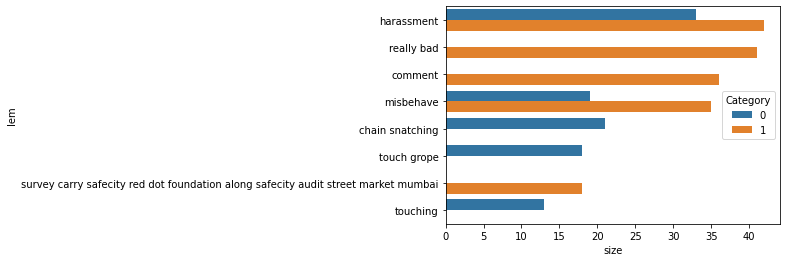

In [42]:
train_dup_count_class = train_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['lem'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

In [43]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = train_dup_count_class['size'].tolist()
cat = train_dup_count_class['Category'].tolist()
desc = train_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

train_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  195


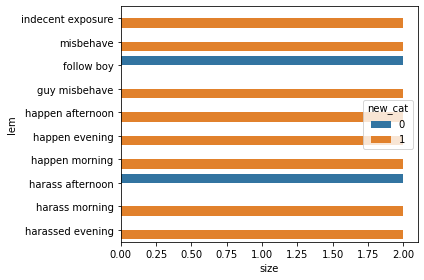

In [44]:
train_dup_count_class_ = train_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class_))

sns.barplot(x = train_dup_count_class_['size'][:10] , y = train_dup_count_class_['lem'][:10] , hue = train_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [45]:
#changing the class label of those texts belonging
#to both classes

dup_desc = train_dup_count_class_.lem.tolist()
train_desc = commenting_train.lem.tolist()

train_cat = commenting_train.Category.tolist()
dup_cat = train_dup_count_class_.new_cat.tolist()

for i in range(len(train_desc)):
  td = train_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     train_cat[i] = dup_cat[j]

commenting_train.Category = train_cat

Number of duplicated entries in train dataset :  692


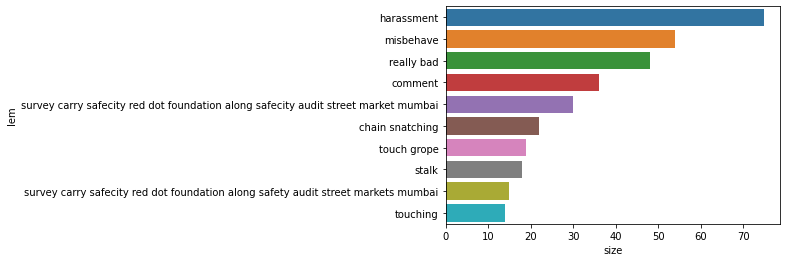

In [46]:
train_duplicate = commenting_train[commenting_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  126


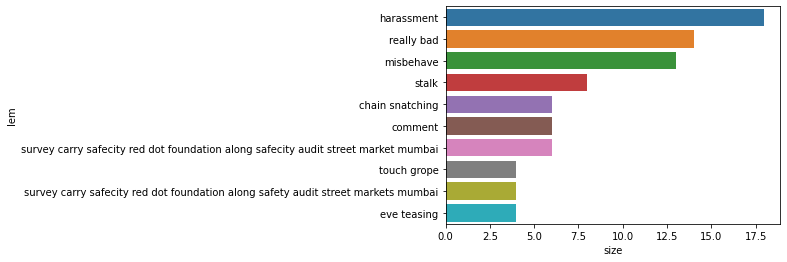

In [47]:
test_duplicate = commenting_test[commenting_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  50


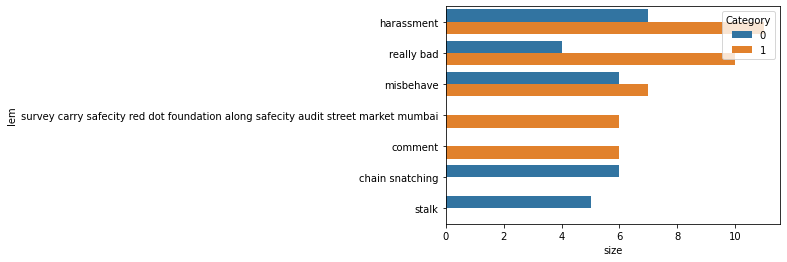

In [48]:
test_dup_count_class = test_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class))

sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['lem'][:10] , hue = test_dup_count_class['Category'][:10])
plt.tight_layout()

In [49]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = test_dup_count_class['size'].tolist()
cat = test_dup_count_class['Category'].tolist()
desc = test_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

test_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  39


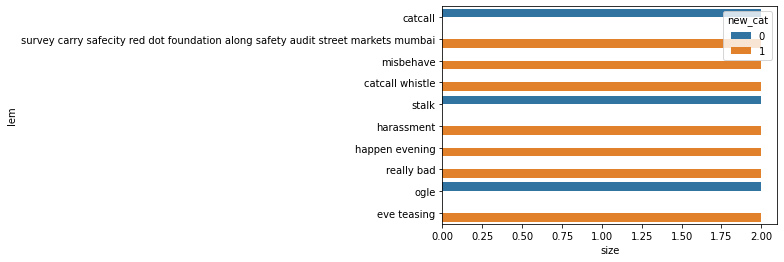

In [50]:
test_dup_count_class_ = test_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class_))

sns.barplot(x = test_dup_count_class_['size'][:10] , y = test_dup_count_class_['lem'][:10] , hue = test_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [51]:
#changing the class label of those texts belonging
#to both classes

dup_desc = test_dup_count_class_.lem.tolist()
test_desc = commenting_test.lem.tolist()

test_cat = commenting_test.Category.tolist()
dup_cat = test_dup_count_class_.new_cat.tolist()

for i in range(len(test_desc)):
  td = test_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     test_cat[i] = dup_cat[j]

commenting_test.Category = test_cat

Number of duplicated entries in train dataset :  126


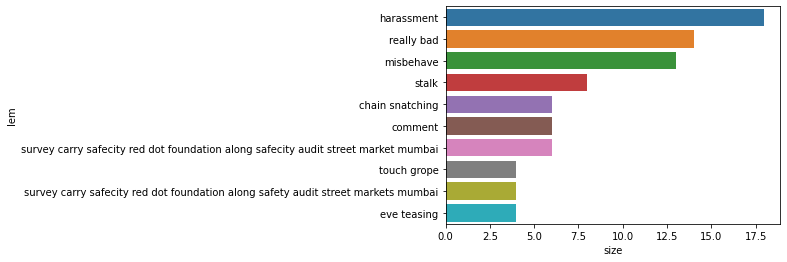

In [52]:
test_duplicate = commenting_test[commenting_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

In [53]:
def numb_words(x):
  words = x.split(" ")
  return len(words)

In [54]:
commenting_train['desc_words'] = commenting_train['lem'].apply(numb_words)
commenting_test['desc_words'] = commenting_test['lem'].apply(numb_words)

#displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21


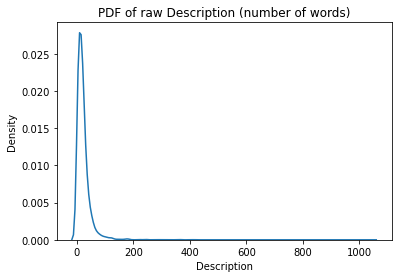

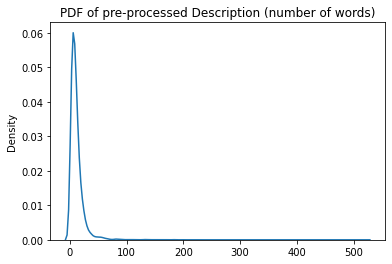

In [55]:
#distribution of description length before and after preprocessing

before = commenting_train['Description'].apply(numb_words)
after = commenting_train['desc_words'].values

sns.kdeplot(before)
plt.title("PDF of raw Description (number of words)")
plt.show()

sns.kdeplot(after)
plt.title("PDF of pre-processed Description (number of words)")
plt.show()

<font color = red> **Interpretation** </font>
> After pre-processing the text data, there is a reduction in the number of words per text

In [56]:
#getting parts of speech

pos_re = {"noun":re.compile('N.*'), "verb":re.compile('V.*'),
          "adverb":re.compile('R.*'), "adjective":re.compile('J.*'),
          "pronoun":re.compile('J.*')}
def count_POS(text, part_of_speech):
  count = 0
  for word, pos in nltk.pos_tag(word_tokenize(text)):
    if re.match(pos_re[part_of_speech],pos):
      count += 1
  return count

commenting_train["noun_count"] = commenting_train["Description"].apply(lambda x: count_POS(x,"noun"))
commenting_train["pronoun_count"] = commenting_train["Description"].apply(lambda x: count_POS(x,"pronoun"))
commenting_train["verb_count"] = commenting_train["Description"].apply(lambda x: count_POS(x,"verb"))
commenting_train["adverb_count"] = commenting_train["Description"].apply(lambda x: count_POS(x,"adverb"))
commenting_train["adjective_count"] = commenting_train["Description"].apply(lambda x: count_POS(x,"adjective"))


commenting_test["noun_count"] = commenting_test["Description"].apply(lambda x: count_POS(x,"noun"))
commenting_test["pronoun_count"] = commenting_test["Description"].apply(lambda x: count_POS(x,"pronoun"))
commenting_test["verb_count"] = commenting_test["Description"].apply(lambda x: count_POS(x,"verb"))
commenting_test["adverb_count"] = commenting_test["Description"].apply(lambda x: count_POS(x,"adverb"))
commenting_test["adjective_count"] = commenting_test["Description"].apply(lambda x: count_POS(x,"adjective"))

In [57]:
commenting_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2


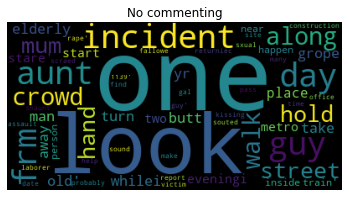

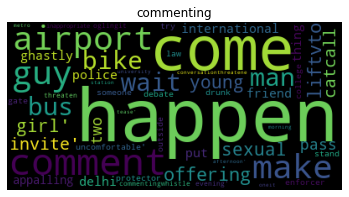

In [58]:
#displaying word cloud of train data 
text_0 = commenting_train[commenting_train['Category'] == 0]['lem'].values
text_1 = commenting_train[commenting_train['Category'] == 1]['lem'].values


wordcloud = WordCloud().generate(str(text_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("No commenting")
plt.show()


wordcloud = WordCloud().generate(str(text_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("commenting")
plt.show()

In [59]:
def sentiment(x):
  word_sent = TextBlob(x).sentiment
  return word_sent.polarity,word_sent.subjectivity

In [60]:
#from itertools import zip
commenting_train['polarity'], commenting_train['subjectivity'] = zip(*commenting_train['Description'].apply(sentiment))
commenting_test['polarity'], commenting_test['subjectivity'] = zip(*commenting_test['Description'].apply(sentiment))

#Displaying train dataset
commenting_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count,polarity,subjectivity
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2,0.1,0.2


In [61]:
commenting_train.drop_duplicates(inplace = True)
commenting_test.drop_duplicates(inplace = True)

In [62]:
scale = StandardScaler()

desc_words = np.array(commenting_train.desc_words.values).reshape(-1,1)
desc_wordst = np.array(commenting_test.desc_words.values).reshape(-1,1)

scale_desc_words = scale.fit(desc_words)
scale_desc_words_train = scale.transform(desc_words)
scale_desc_words_test = scale.transform(desc_wordst)

#--------------------------------------------------------------------

noun_count = np.array(commenting_train.noun_count).reshape(-1,1)
noun_countt = np.array(commenting_test.noun_count).reshape(-1,1)

scale_desc_words = scale.fit(noun_count)
scale_noun_count_train = scale.transform(noun_count)
scale_noun_count_test = scale.transform(noun_countt)

#--------------------------------------------------------------------

pronoun_count	= np.array(commenting_train.pronoun_count).reshape(-1,1)
pronoun_countt	= np.array(commenting_test.pronoun_count).reshape(-1,1)

scale_pronoun_count = scale.fit(pronoun_count)
scale_pronoun_count_train = scale.transform(pronoun_count)
scale_pronoun_count_test = scale.transform(pronoun_countt)

#--------------------------------------------------------------------

verb_count	= np.array(commenting_train.verb_count).reshape(-1,1)
verb_countt	= np.array(commenting_test.verb_count).reshape(-1,1)

scale_verb_count = scale.fit(verb_count)
scale_verb_count_train = scale.transform(verb_count)
scale_verb_count_test = scale.transform(verb_countt)

#--------------------------------------------------------------------

adverb_count	= np.array(commenting_train.adverb_count).reshape(-1,1)
adverb_countt	= np.array(commenting_test.adverb_count).reshape(-1,1)

scale_adverb_count = scale.fit(adverb_count)
scale_adverb_count_train = scale.transform(adverb_count)
scale_adverb_count_test = scale.transform(adverb_countt)

#--------------------------------------------------------------------

adjective_count	= np.array(commenting_train.adjective_count).reshape(-1,1)
adjective_countt	= np.array(commenting_test.adjective_count).reshape(-1,1)

scale_adjective_count = scale.fit(adjective_count)
scale_adjective_count_train = scale.transform(adjective_count)
scale_adjective_count_test = scale.transform(adjective_countt)

#--------------------------------------------------------------------

polarity	= np.array(commenting_train.polarity).reshape(-1,1)
polarityt	= np.array(commenting_test.polarity).reshape(-1,1)

scale_polarity = scale.fit(polarity)
scale_polarity_train = scale.transform(polarity)
scale_polarity_test = scale.transform(polarityt)

#--------------------------------------------------------------------

subjectivity = np.array(commenting_train.subjectivity).reshape(-1,1)
subjectivityt = np.array(commenting_test.subjectivity).reshape(-1,1)

scale_subjectivity = scale.fit(subjectivity)
scale_subjectivity_train = scale.transform(subjectivity)
scale_subjectivity_test = scale.transform(subjectivityt)

#--------------------------------------------------------------------

In [63]:
#reading glove_vectors file from drive
with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [64]:
#TFIDF representation of essay

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(commenting_train['lem'].values)  #creates the vocabulary list from the train set

#representing essay in train and test set using the vocabulary list
x_train_essay_tfidf = tfidf_vectorizer.transform(commenting_train['lem'].values)
x_test_essay_tfidf = tfidf_vectorizer.transform(commenting_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_essay_tfidf.shape[1])
print("\nTest set: ", x_test_essay_tfidf.shape[1])

Dimension of essay after vectorizing

Train set:  8745

Test set:  8745


In [65]:
#TFIDF-W2V represntation of essay

dictionary = dict(zip(tfidf_vectorizer.get_feature_names(), list(tfidf_vectorizer.idf_))) #stores word as key ans its tfidf value as value
tfidf_words = set(tfidf_vectorizer.get_feature_names()) #gets the unique words  

# tfidf Word2Vec
# compute tfidf word2vec for each essay 
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(commenting_train['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)


tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(commenting_test['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test = np.array(tfidf_w2v_vectors_test)

100%|██████████| 1608/1608 [00:00<00:00, 9777.92it/s]


In [66]:
#TFIDF ngram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4))
tfidf_vectorizer.fit(commenting_train['lem'].values)

#representing essay in train and test set using the vocabulary list
x_train_tfidf = tfidf_vectorizer.transform(commenting_train['lem'].values)
x_test_tfidf = tfidf_vectorizer.transform(commenting_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_tfidf.shape)
print("\nTest set: ", x_test_tfidf.shape)

Dimension of essay after vectorizing

Train set:  (6659, 176722)

Test set:  (1608, 176722)


In [67]:
#train and test features

tfidf_features = hstack((x_train_tfidf , tfidf_w2v_vectors_train , scale_desc_words_train ,	scale_noun_count_train , scale_pronoun_count_train ,
                      scale_verb_count_train ,	scale_adverb_count_train ,	scale_adjective_count_train ,
                      	scale_polarity_train ,	scale_subjectivity_train )).tocsr()


tfidf_featurest = hstack((x_test_tfidf , tfidf_w2v_vectors_test , scale_desc_words_test ,	scale_noun_count_test , scale_pronoun_count_test ,
                      scale_verb_count_test ,	scale_adverb_count_test ,	scale_adjective_count_test ,
                      	scale_polarity_test ,	scale_subjectivity_test )).tocsr()
                       
print("Shape of train features : ", tfidf_features.shape)
print("Shape of test features : ", tfidf_featurest.shape)                       

Shape of train features :  (6659, 177030)
Shape of test features :  (1608, 177030)


In [68]:
target = commenting_train.Category
targett = commenting_test.Category

#### **Hyper-parameter Tunning & Training**

In [69]:
dt = DecisionTreeClassifier( random_state = 42 , class_weight = "balanced")

#hyperparameter tunning
prams={ 'max_depth':[3,5,10],
       'min_samples_split' : [25,50,75,100,150,200]
       }

print("5- fold CV Progress : \n ")
search=RandomizedSearchCV(dt, param_distributions=prams, verbose=10, n_jobs=-1 , scoring = 'accuracy' , random_state = 42)

result = search.fit(tfidf_features, target)

print("\n\nOptimum parameter values :")
result.best_params_

5- fold CV Progress : 
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Optimum parameter values :


{'max_depth': 3, 'min_samples_split': 200}

In [70]:
#best model
best_model = DecisionTreeClassifier(random_state = 42 , class_weight = "balanced" , 
                                    max_depth = 3 , min_samples_split = 200
                               )

best_model.fit(tfidf_features, target)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=200, random_state=42)

In [71]:
#prediction
train_pred = best_model.predict(tfidf_features)
test_pred = best_model.predict(tfidf_featurest)


#### **Performance Metrics**

Train set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

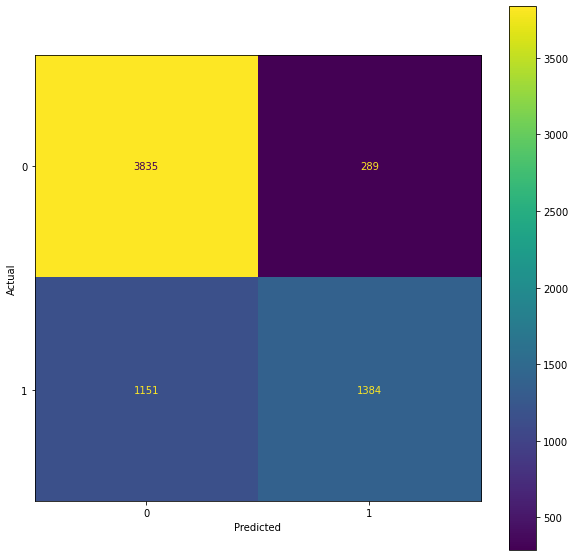

In [72]:
#train
print("Train set Confusion Matrix")
cm = confusion_matrix(target , train_pred )
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Not Commenting','Commenting']

cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

Test set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

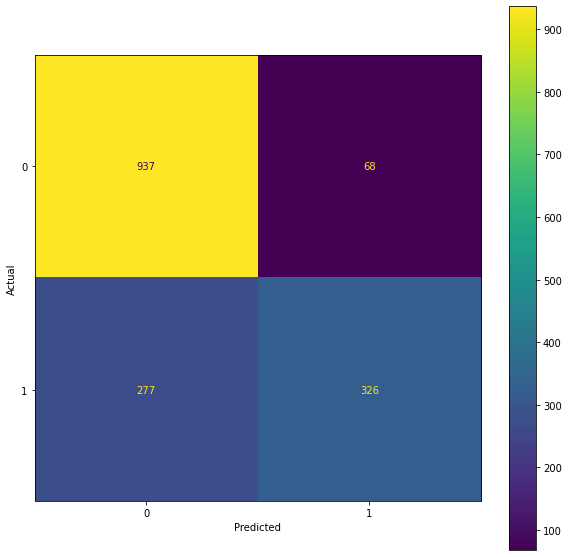

In [73]:
#test
print("Test set Confusion Matrix")
cm = confusion_matrix(targett , test_pred )
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Not Commenting','Commenting']

cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

In [74]:
#performance metric used in the paper
%%time
train_acc = accuracy_score(target , train_pred )
test_acc = accuracy_score(targett , test_pred )
print("Performance Metric used in the paper : Accuracy\n")
print("Train Accuracy : ", train_acc)
print("Test Accuracy : ", test_acc ,"\n")

print("-"*50)

train_f1 = f1_score(target , train_pred )
test_f1 = f1_score(targett , test_pred )
print("\nTrain F1 score :",train_f1 )
print("Test F1 score :",test_f1 )

Performance Metric used in the paper : Accuracy

Train Accuracy :  0.7837513140111128
Test Accuracy :  0.7854477611940298 

--------------------------------------------------

Train F1 score : 0.6577946768060836
Test F1 score : 0.6539618856569709


### <font color = green> **Groping Dataset** </font>

<font color = red> **Results** </font>

**Metrics used in paper:** Accuracy <br>
> **Train score:** 82% <br>
> **Test score:** 81%

**F1 score**
> **Train score:** 0.62 <br>
> **Test score:** 0.59

In [91]:
groping_train = pd.read_csv("/content/drive/MyDrive/Datasets/groping/train.csv")
groping_test = pd.read_csv("/content/drive/MyDrive/Datasets/groping/test.csv")

In [92]:
print("Shape of train :" , groping_train.shape)
print("Shape of test :" , groping_test.shape)

Shape of train : (7201, 2)
Shape of test : (1701, 2)


In [ ]:
#train data
groping_train.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",1
1,This incident took place in the evening.I was ...,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [ ]:
#test data
groping_test.head()

,Description,Category
0,"During morning, a woman was walking by and thi...",0
1,A man tried to brush his penis off of a woman'...,1
2,This happened to a fellow passenger of mine tr...,0
3,ogling,0
4,When I was returning my home after finishing m...,1


#### **Exploratory Data Analysis**

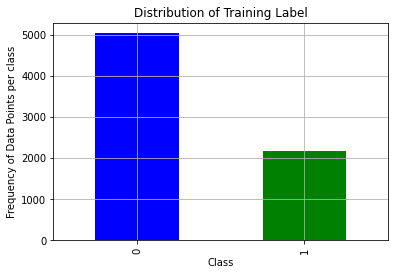

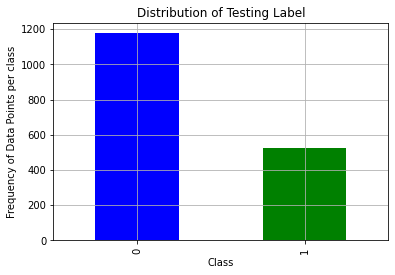

In [ ]:
#checking the distribution of the data in train,cv and test

#counting number of points per class in train set
train_dist = groping_train.Category.value_counts()



#counting number of points per class in test set
test_dist = groping_test.Category.value_counts()


#plotting the number of points per class in train set
train_dist.plot( kind = "bar" , color = ["blue" , "green"])
plt.title("Distribution of Training Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")
plt.grid()
plt.show()



#plotting the number of points per class in test set
test_dist.plot( kind = "bar" , color = ["blue" , "green"])
plt.title("Distribution of Testing Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")
plt.grid()
plt.show()

<font color = red> **Interpretation** </font>
> The distribution of data in the train and test set is similar. Hence ML models can be used to make predictions

Number of data points per class : 
  0    5035
1    2166
Name: Category, dtype: int64


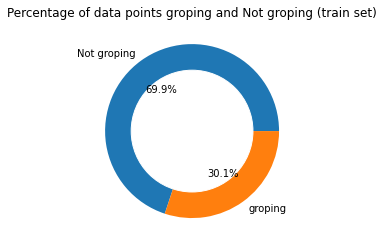

In [ ]:
#https://www.python-graph-gallery.com/donut-plot/
#https://pythonspot.com/matplotlib-pie-chart/

#checking for class imbalance 
print("Number of data points per class : \n ", groping_train.Category.value_counts() )

# create data
size_of_groups=[groping_train.Category.value_counts()[0] , groping_train.Category.value_counts()[1]]

#labels
label = ["Not groping" , "groping" ]

# Create a pieplot
plt.pie(size_of_groups , autopct='%1.1f%%' , labels=label)

#tiltle
plt.title("Percentage of data points groping and Not groping (train set)")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<font color = red> **Interpretation** </font>
> The dataset is imblanced. It needs to be balanced before model training

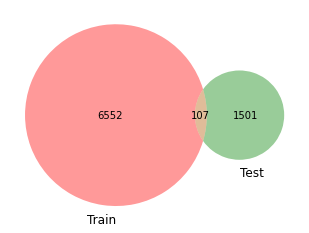

In [ ]:
#checking number of data points common in train and test set

#https://stackoverflow.com/questions/37725099/plot-venn-diagram-with-pandas-and-matplotlib-venn

set1 = set(groping_train.Description)
set2 = set(groping_test.Description)

set_array = []

set_array.append(set1)
set_array.append(set2)

venn2([set1, set2], ('Train', 'Test')) # venn2 works for two sets

plt.show()

<font color = red> **Interpretation** </font>
> There is only a small fraction of overlap of data between train and test dataset. The test dataset is a good to check how well the model works on unseen data

Number of duplicated entries in train dataset :  512


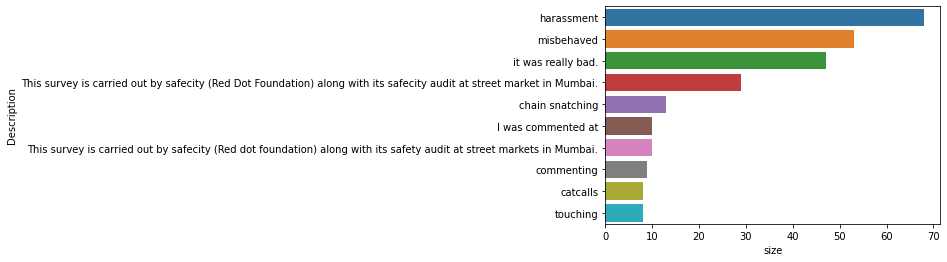

In [ ]:
train_duplicate = groping_train[groping_train.duplicated()]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['Description'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  168


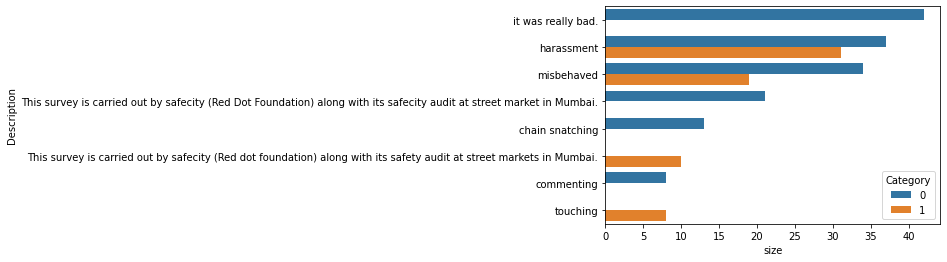

In [ ]:
train_dup_count_class = train_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['Description'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : groping and groping. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

Number of duplicated entries in test dataset :  84


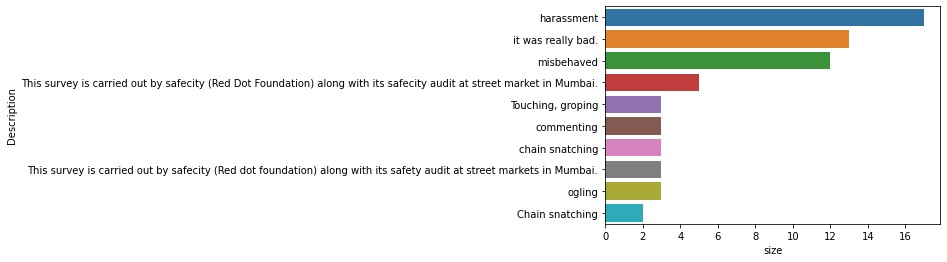

In [ ]:
test_duplicate = groping_test[groping_test.duplicated()]
print("Number of duplicated entries in test dataset : ", len(test_duplicate))

test_dup_count = test_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)

sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['Description'][:10])

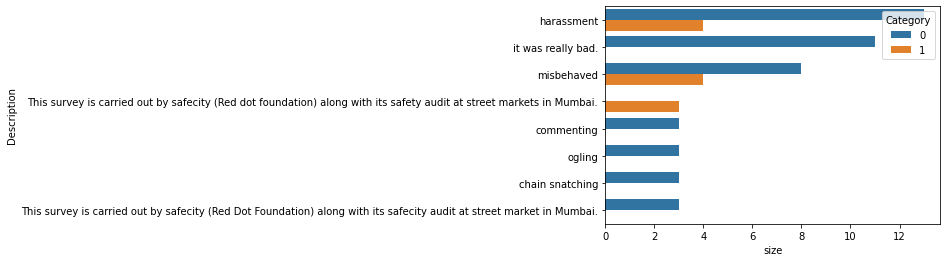

In [ ]:
test_dup_count_class = test_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['Description'][:10] , hue = test_dup_count_class['Category'][:10])

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : groping and groping. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

#### **Feature Engineering**

In [93]:
#lower case
def to_lower(x):
  return x.lower()

In [94]:
groping_train['lower'] = groping_train['Description'].apply(to_lower)
groping_test['lower'] = groping_test['Description'].apply(to_lower)

#displaying train dataset
groping_train.head()

,Description,Category,lower
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums..."
1,This incident took place in the evening.I was ...,0,this incident took place in the evening.i was ...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0,i was waiting for the bus. a man came on a bik...
3,Incident happened inside the train,0,incident happened inside the train
4,I witnessed an incident when a chain was bruta...,0,i witnessed an incident when a chain was bruta...


In [95]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
"'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had",
"he'd've": "he would have", "he'll": "he shall", "he'll've": "he shall have", "he's": "he has",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has",
"I'd": "I had", "I'd've": "I would have", "I'll": "I shall", "I'll've": "I shall have",
"I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it shall", "it'll've": "it shall have", "it's": "it has",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
"mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
"shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she shall",
"she'll've": "she shall have", "she's": "she has", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would",
"that'd've": "that would have", "that's": "that has", "there'd": "there had", "there'd've": "there would have",
"there's": "there has", "they'd": "they had", "they'd've": "they would have", "they'll": "they shall",
"they'll've": "they shall have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we had", "we'd've": "we would have", "we'll": "we will",
"we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what shall", "what'll've": "what shall have", "what're": "what are", "what's": "what has",
"what've": "what have", "when's": "when has", "when've": "when have", "where'd": "where did",
"where's": "where has", "where've": "where have", "who'll": "who shall", "who'll've": "who shall have",
"who's": "who has", "who've": "who have", "why's": "why has", "why've": "why have",
"will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
"you'd": "you had", "you'd've": "you would have", "you'll": "you shall", "you'll've": "you shall have",
"you're": "you are", "you've": "you have"
}

In [96]:
#expand contractions

def expand_con(x):
  expanded = []
  words = x.split(" ")
  for index, word in enumerate(words) :
    if word in contractions:
      words[index] = contractions[word]
    

  return  ' '.join(words)

In [97]:
groping_train['expand'] = groping_train['lower'].apply(expand_con)
groping_test['expand'] = groping_test['lower'].apply(expand_con)

#displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums..."


In [98]:
#removing all characters except alphanumeric 

def clean_text(x):
    pattern = r'[^a-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

In [99]:
groping_train['clean_text'] = groping_train['expand'].apply(clean_text)
groping_test['clean_text'] = groping_test['expand'].apply(clean_text)

#displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand,clean_text
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...


In [100]:
#adding space between a number and character
#40yers - 40 yrs
#3pm - 3 pm

def split_num_alpha(x):
  regex = r"(?i)(?<=\d)(?=[a-z])|(?<=[a-z])(?=\d)"
  text = re.sub(regex, " ", x, 0)
  if text:
      return text
  else:
      return x

In [101]:
groping_train['split_num_alpha'] = groping_train['clean_text'].apply(split_num_alpha)
groping_test['split_num_alpha'] = groping_test['clean_text'].apply(split_num_alpha)

#displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...


In [102]:
#removing stop words

# set of stop words
stop_words = set(stopwords.words('english')) 

def remove_stop_words(x): 
  # tokens of words  
  word_tokens = word_tokenize(x) 
    
  filtered_sentence = [] 
  
  for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

  return " ".join(filtered_sentence)


In [103]:
groping_train['remove_stop_words'] = groping_train['split_num_alpha'].apply(remove_stop_words)
groping_test['remove_stop_words'] = groping_test['split_num_alpha'].apply(remove_stop_words)

#displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...


In [104]:
def lem(x):

  lem_l = []

  doc = nlp(x)
  for token in doc:
    tl = token.lemma_
    if tl == '-PRON-':
      continue
    else:
      lem_l.append(tl)
  
  lem_sen = ' '.join([i for i in lem_l]) 

  return lem_sen


In [105]:
groping_train['lem'] = groping_train['remove_stop_words'].apply(lem)
groping_test['lem'] = groping_test['remove_stop_words'].apply(lem)

In [106]:
groping_train.head(2)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...
1,This incident took place in the evening.I was ...,0,this incident took place in the evening.i was ...,this incident took place in the evening.i was ...,this incident took place in the eveningi was i...,this incident took place in the eveningi was i...,incident took place eveningi metro two guys st...,incident take place eveningi metro two guy sta...


Number of duplicated entries in train dataset :  692


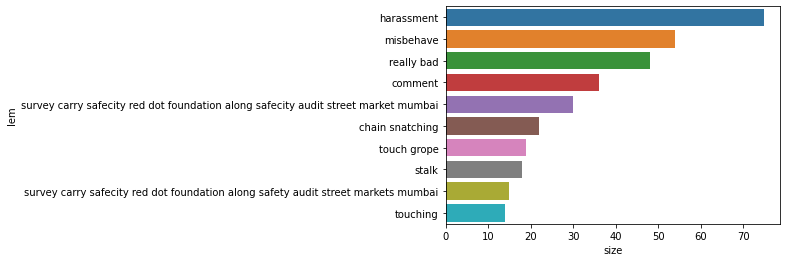

In [107]:
#displaying the duplicate entries after pre-processing

train_duplicate = groping_train[groping_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  218


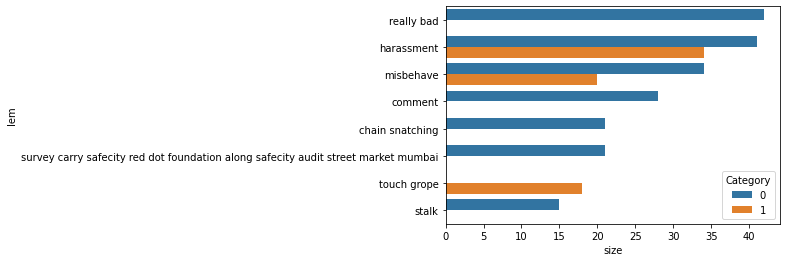

In [108]:
train_dup_count_class = train_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['lem'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

In [109]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = train_dup_count_class['size'].tolist()
cat = train_dup_count_class['Category'].tolist()
desc = train_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

train_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  195


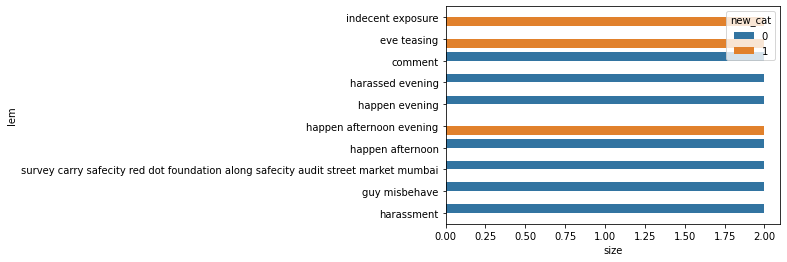

In [110]:
train_dup_count_class_ = train_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class_))

sns.barplot(x = train_dup_count_class_['size'][:10] , y = train_dup_count_class_['lem'][:10] , hue = train_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [111]:
#changing the class label of those texts belonging
#to both classes

dup_desc = train_dup_count_class_.lem.tolist()
train_desc = groping_train.lem.tolist()

train_cat = groping_train.Category.tolist()
dup_cat = train_dup_count_class_.new_cat.tolist()

for i in range(len(train_desc)):
  td = train_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     train_cat[i] = dup_cat[j]

groping_train.Category = train_cat

Number of duplicated entries in train dataset :  692


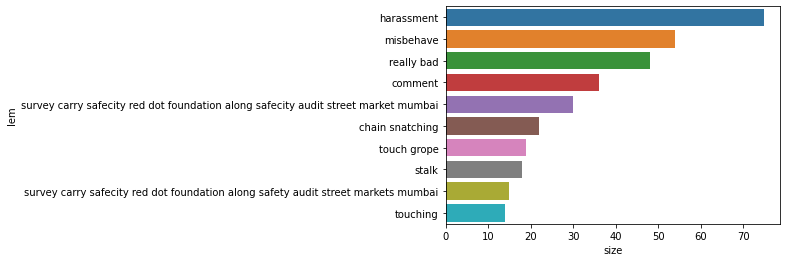

In [112]:
train_duplicate = groping_train[groping_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  126


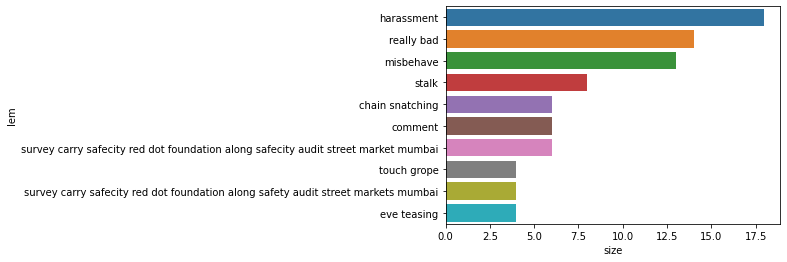

In [113]:
test_duplicate = groping_test[groping_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  46


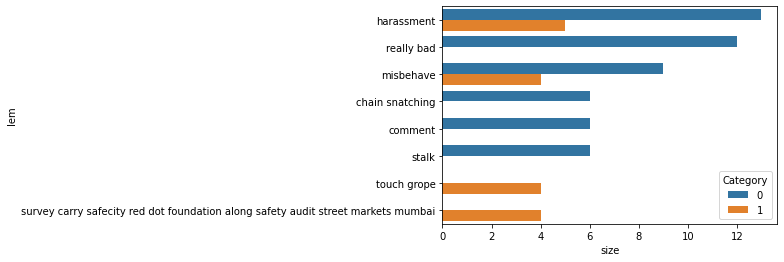

In [114]:
test_dup_count_class = test_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class))

sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['lem'][:10] , hue = test_dup_count_class['Category'][:10])
plt.tight_layout()

In [115]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = test_dup_count_class['size'].tolist()
cat = test_dup_count_class['Category'].tolist()
desc = test_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

test_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  39


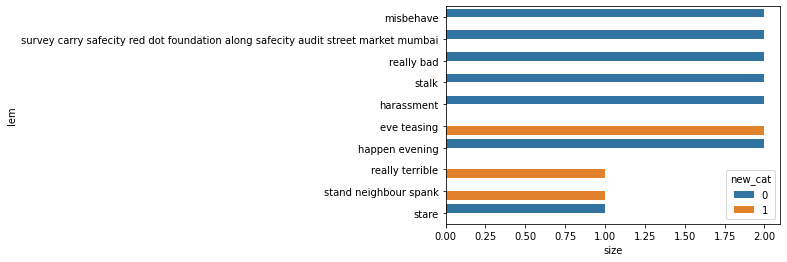

In [116]:
test_dup_count_class_ = test_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class_))

sns.barplot(x = test_dup_count_class_['size'][:10] , y = test_dup_count_class_['lem'][:10] , hue = test_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [117]:
#changing the class label of those texts belonging
#to both classes

dup_desc = test_dup_count_class_.lem.tolist()
test_desc = groping_test.lem.tolist()

test_cat = groping_test.Category.tolist()
dup_cat = test_dup_count_class_.new_cat.tolist()

for i in range(len(test_desc)):
  td = test_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     test_cat[i] = dup_cat[j]

groping_test.Category = test_cat

Number of duplicated entries in train dataset :  126


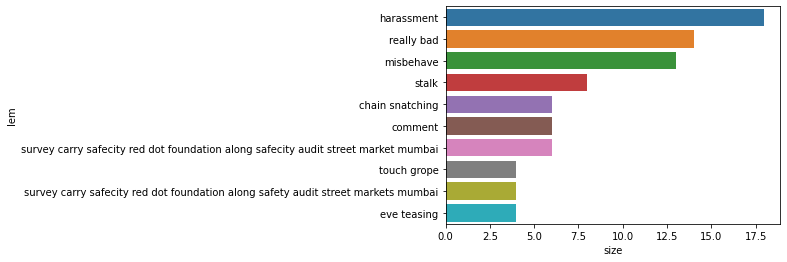

In [118]:
test_duplicate = groping_test[groping_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

In [119]:
def numb_words(x):
  words = x.split(" ")
  return len(words)

In [120]:
groping_train['desc_words'] = groping_train['lem'].apply(numb_words)
groping_test['desc_words'] = groping_test['lem'].apply(numb_words)

#displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21


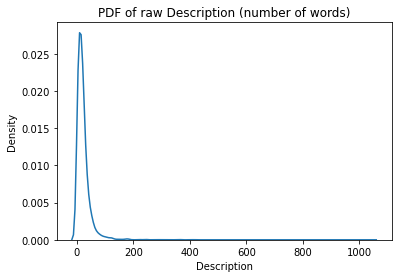

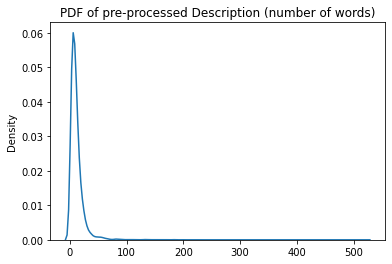

In [121]:
#distribution of description length before and after preprocessing

before = groping_train['Description'].apply(numb_words)
after = groping_train['desc_words'].values

sns.kdeplot(before)
plt.title("PDF of raw Description (number of words)")
plt.show()

sns.kdeplot(after)
plt.title("PDF of pre-processed Description (number of words)")
plt.show()

<font color = red> **Interpretation** </font>
> After pre-processing the text data, there is a reduction in the number of words per text

In [122]:
#getting parts of speech

pos_re = {"noun":re.compile('N.*'), "verb":re.compile('V.*'),
          "adverb":re.compile('R.*'), "adjective":re.compile('J.*'),
          "pronoun":re.compile('J.*')}
def count_POS(text, part_of_speech):
  count = 0
  for word, pos in nltk.pos_tag(word_tokenize(text)):
    if re.match(pos_re[part_of_speech],pos):
      count += 1
  return count

groping_train["noun_count"] = groping_train["Description"].apply(lambda x: count_POS(x,"noun"))
groping_train["pronoun_count"] = groping_train["Description"].apply(lambda x: count_POS(x,"pronoun"))
groping_train["verb_count"] = groping_train["Description"].apply(lambda x: count_POS(x,"verb"))
groping_train["adverb_count"] = groping_train["Description"].apply(lambda x: count_POS(x,"adverb"))
groping_train["adjective_count"] = groping_train["Description"].apply(lambda x: count_POS(x,"adjective"))


groping_test["noun_count"] = groping_test["Description"].apply(lambda x: count_POS(x,"noun"))
groping_test["pronoun_count"] = groping_test["Description"].apply(lambda x: count_POS(x,"pronoun"))
groping_test["verb_count"] = groping_test["Description"].apply(lambda x: count_POS(x,"verb"))
groping_test["adverb_count"] = groping_test["Description"].apply(lambda x: count_POS(x,"adverb"))
groping_test["adjective_count"] = groping_test["Description"].apply(lambda x: count_POS(x,"adjective"))

In [123]:
groping_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2


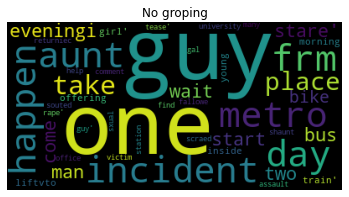

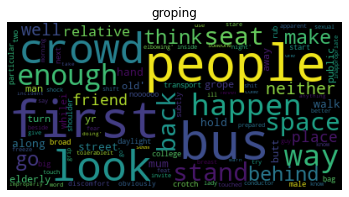

In [124]:
#displaying word cloud of train data 
text_0 = groping_train[groping_train['Category'] == 0]['lem'].values
text_1 = groping_train[groping_train['Category'] == 1]['lem'].values


wordcloud = WordCloud().generate(str(text_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("No groping")
plt.show()


wordcloud = WordCloud().generate(str(text_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("groping")
plt.show()

In [125]:
def sentiment(x):
  word_sent = TextBlob(x).sentiment
  return word_sent.polarity,word_sent.subjectivity

In [126]:
#from itertools import zip
groping_train['polarity'], groping_train['subjectivity'] = zip(*groping_train['Description'].apply(sentiment))
groping_test['polarity'], groping_test['subjectivity'] = zip(*groping_test['Description'].apply(sentiment))

#Displaying train dataset
groping_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count,polarity,subjectivity
0,"Was walking along crowded street, holding mums...",1,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2,0.1,0.2


In [127]:
groping_train.drop_duplicates(inplace = True)
groping_test.drop_duplicates(inplace = True)

In [128]:
scale = StandardScaler()

desc_words = np.array(groping_train.desc_words.values).reshape(-1,1)
desc_wordst = np.array(groping_test.desc_words.values).reshape(-1,1)

scale_desc_words = scale.fit(desc_words)
scale_desc_words_train = scale.transform(desc_words)
scale_desc_words_test = scale.transform(desc_wordst)

#--------------------------------------------------------------------

noun_count = np.array(groping_train.noun_count).reshape(-1,1)
noun_countt = np.array(groping_test.noun_count).reshape(-1,1)

scale_desc_words = scale.fit(noun_count)
scale_noun_count_train = scale.transform(noun_count)
scale_noun_count_test = scale.transform(noun_countt)

#--------------------------------------------------------------------

pronoun_count	= np.array(groping_train.pronoun_count).reshape(-1,1)
pronoun_countt	= np.array(groping_test.pronoun_count).reshape(-1,1)

scale_pronoun_count = scale.fit(pronoun_count)
scale_pronoun_count_train = scale.transform(pronoun_count)
scale_pronoun_count_test = scale.transform(pronoun_countt)

#--------------------------------------------------------------------

verb_count	= np.array(groping_train.verb_count).reshape(-1,1)
verb_countt	= np.array(groping_test.verb_count).reshape(-1,1)

scale_verb_count = scale.fit(verb_count)
scale_verb_count_train = scale.transform(verb_count)
scale_verb_count_test = scale.transform(verb_countt)

#--------------------------------------------------------------------

adverb_count	= np.array(groping_train.adverb_count).reshape(-1,1)
adverb_countt	= np.array(groping_test.adverb_count).reshape(-1,1)

scale_adverb_count = scale.fit(adverb_count)
scale_adverb_count_train = scale.transform(adverb_count)
scale_adverb_count_test = scale.transform(adverb_countt)

#--------------------------------------------------------------------

adjective_count	= np.array(groping_train.adjective_count).reshape(-1,1)
adjective_countt	= np.array(groping_test.adjective_count).reshape(-1,1)

scale_adjective_count = scale.fit(adjective_count)
scale_adjective_count_train = scale.transform(adjective_count)
scale_adjective_count_test = scale.transform(adjective_countt)

#--------------------------------------------------------------------

polarity	= np.array(groping_train.polarity).reshape(-1,1)
polarityt	= np.array(groping_test.polarity).reshape(-1,1)

scale_polarity = scale.fit(polarity)
scale_polarity_train = scale.transform(polarity)
scale_polarity_test = scale.transform(polarityt)

#--------------------------------------------------------------------

subjectivity = np.array(groping_train.subjectivity).reshape(-1,1)
subjectivityt = np.array(groping_test.subjectivity).reshape(-1,1)

scale_subjectivity = scale.fit(subjectivity)
scale_subjectivity_train = scale.transform(subjectivity)
scale_subjectivity_test = scale.transform(subjectivityt)

#--------------------------------------------------------------------

In [129]:
#reading glove_vectors file from drive
with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [130]:
#TFIDF representation of essay

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(groping_train['lem'].values)  #creates the vocabulary list from the train set

#representing essay in train and test set using the vocabulary list
x_train_essay_tfidf = tfidf_vectorizer.transform(groping_train['lem'].values)
x_test_essay_tfidf = tfidf_vectorizer.transform(groping_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_essay_tfidf.shape[1])
print("\nTest set: ", x_test_essay_tfidf.shape[1])

Dimension of essay after vectorizing

Train set:  8745

Test set:  8745


In [131]:
#TFIDF-W2V represntation of essay

dictionary = dict(zip(tfidf_vectorizer.get_feature_names(), list(tfidf_vectorizer.idf_))) #stores word as key ans its tfidf value as value
tfidf_words = set(tfidf_vectorizer.get_feature_names()) #gets the unique words  

# tfidf Word2Vec
# compute tfidf word2vec for each essay 
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(groping_train['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)


tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(groping_test['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test = np.array(tfidf_w2v_vectors_test)

100%|██████████| 1608/1608 [00:00<00:00, 8663.88it/s]


In [132]:
#TFIDF ngram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4))
tfidf_vectorizer.fit(groping_train['lem'].values)

#representing essay in train and test set using the vocabulary list
x_train_tfidf = tfidf_vectorizer.transform(groping_train['lem'].values)
x_test_tfidf = tfidf_vectorizer.transform(groping_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_tfidf.shape)
print("\nTest set: ", x_test_tfidf.shape)

Dimension of essay after vectorizing

Train set:  (6659, 176722)

Test set:  (1608, 176722)


In [133]:
#train and test features

tfidf_features = hstack((x_train_tfidf , tfidf_w2v_vectors_train , scale_desc_words_train ,	scale_noun_count_train , scale_pronoun_count_train ,
                      scale_verb_count_train ,	scale_adverb_count_train ,	scale_adjective_count_train ,
                      	scale_polarity_train ,	scale_subjectivity_train )).tocsr()


tfidf_featurest = hstack((x_test_tfidf , tfidf_w2v_vectors_test , scale_desc_words_test ,	scale_noun_count_test , scale_pronoun_count_test ,
                      scale_verb_count_test ,	scale_adverb_count_test ,	scale_adjective_count_test ,
                      	scale_polarity_test ,	scale_subjectivity_test )).tocsr()
                       
print("Shape of train features : ", tfidf_features.shape)
print("Shape of test features : ", tfidf_featurest.shape)                       

Shape of train features :  (6659, 177030)
Shape of test features :  (1608, 177030)


In [134]:
target = groping_train.Category
targett = groping_test.Category

#### **Hyper-parameter Tunning & Training**

In [135]:
dt = DecisionTreeClassifier( random_state = 42 , class_weight = "balanced")

#hyperparameter tunning
prams={ 'max_depth':[3,5,10],
       'min_samples_split' : [25,50,75,100,150,200]
       }

print("5- fold CV Progress : \n ")
search=RandomizedSearchCV(dt, param_distributions=prams, verbose=10, n_jobs=-1 , scoring = 'accuracy' , random_state = 42)

result = search.fit(tfidf_features, target)

print("\n\nOptimum parameter values :")
result.best_params_

5- fold CV Progress : 
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Optimum parameter values :


{'max_depth': 3, 'min_samples_split': 200}

In [136]:
#best model
best_model = DecisionTreeClassifier(random_state = 42 , class_weight = "balanced" , 
                                    max_depth = 3 , min_samples_split = 200
                               )

best_model.fit(tfidf_features, target)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=200, random_state=42)

In [137]:
#prediction
train_pred = best_model.predict(tfidf_features)
test_pred = best_model.predict(tfidf_featurest)


#### **Performance Metrics**

Train set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

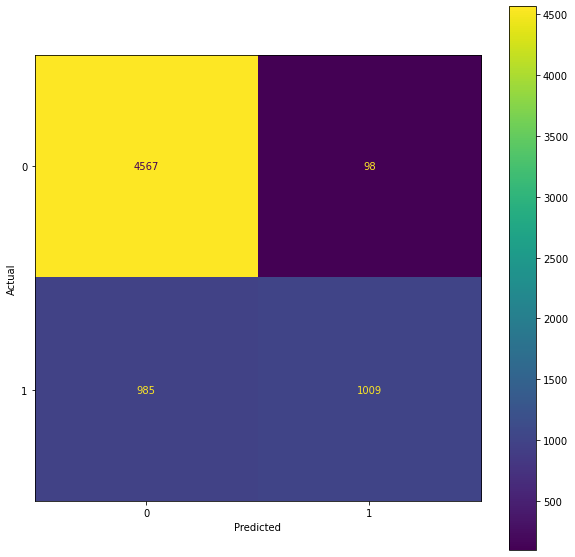

In [138]:
#train
print("Train set Confusion Matrix")
cm = confusion_matrix(target , train_pred )
fig, ax = plt.subplots(figsize=(10,10))


cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

Test set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

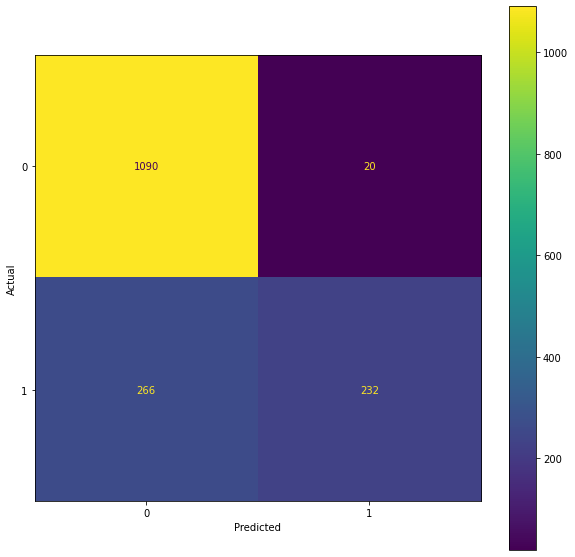

In [139]:
#test
print("Test set Confusion Matrix")
cm = confusion_matrix(targett , test_pred )
fig, ax = plt.subplots(figsize=(10,10))


cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

In [140]:
#performance metric used in the paper
train_acc = accuracy_score(target , train_pred )
test_acc = accuracy_score(targett , test_pred )
print("Performance Metric used in the paper : Accuracy\n")
print("Train Accuracy : ", train_acc)
print("Test Accuracy : ", test_acc ,"\n")

print("-"*50)

train_f1 = f1_score(target , train_pred )
test_f1 = f1_score(targett , test_pred )
print("\nTrain F1 score :",train_f1 )
print("Test F1 score :",test_f1 )

Performance Metric used in the paper : Accuracy

Train Accuracy :  0.8373629674125244
Test Accuracy :  0.822139303482587 

--------------------------------------------------

Train F1 score : 0.6507578200580458
Test F1 score : 0.6186666666666667


### <font color = green> **Ogling Dataset** </font>

<font color = red> **Results** </font>

**Metrics used in paper:** Accuracy <br>
> **Train score:** 84% <br>
> **Test score:** 83%

**F1 score**
> **Train score:** 0.46 <br>
> **Test score:** 0.41

In [141]:
ogling_train = pd.read_csv("/content/drive/MyDrive/Datasets/ogling/train.csv")
ogling_test = pd.read_csv("/content/drive/MyDrive/Datasets/ogling/test.csv")

In [ ]:
print("Shape of train :" , ogling_train.shape)
print("Shape of test :" , ogling_test.shape)

Shape of train : (7201, 2)
Shape of test : (1701, 2)


In [ ]:
#train data
ogling_train.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",0
1,This incident took place in the evening.I was ...,1
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [ ]:
#test data
ogling_test.head()

,Description,Category
0,"During morning, a woman was walking by and thi...",1
1,A man tried to brush his penis off of a woman'...,0
2,This happened to a fellow passenger of mine tr...,1
3,ogling,1
4,When I was returning my home after finishing m...,0


#### **Exploratory Data Analysis**

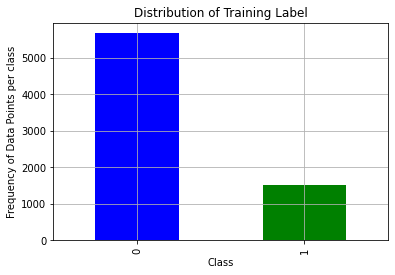

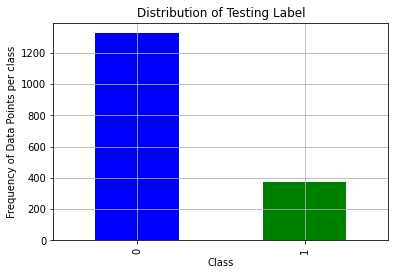

In [ ]:
#checking the distribution of the data in train,cv and test

#counting number of points per class in train set
train_dist = ogling_train.Category.value_counts()



#counting number of points per class in test set
test_dist = ogling_test.Category.value_counts()


#plotting the number of points per class in train set
train_dist.plot( kind = "bar" , color = ["blue" , "green"])
plt.title("Distribution of Training Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")
plt.grid()
plt.show()



#plotting the number of points per class in test set
test_dist.plot( kind = "bar" , color = ["blue" , "green"])
plt.title("Distribution of Testing Label")
plt.xlabel("Class")
plt.ylabel("Frequency of Data Points per class")
plt.grid()
plt.show()

<font color = red> **Interpretation** </font>
> The distribution of data in the train and test set is similar. Hence ML models can be used to make predictions

Number of data points per class : 
  0    5675
1    1526
Name: Category, dtype: int64


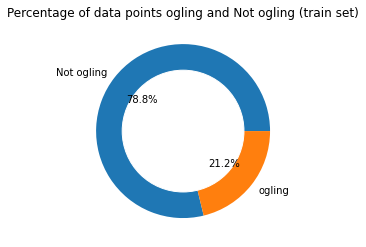

In [ ]:
#https://www.python-graph-gallery.com/donut-plot/
#https://pythonspot.com/matplotlib-pie-chart/

#checking for class imbalance 
print("Number of data points per class : \n ", ogling_train.Category.value_counts() )

# create data
size_of_groups=[ogling_train.Category.value_counts()[0] , ogling_train.Category.value_counts()[1]]

#labels
label = ["Not ogling" , "ogling" ]

# Create a pieplot
plt.pie(size_of_groups , autopct='%1.1f%%' , labels=label)

#tiltle
plt.title("Percentage of data points ogling and Not ogling (train set)")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<font color = red> **Interpretation** </font>
> The dataset is imblanced. It needs to be balanced before model training

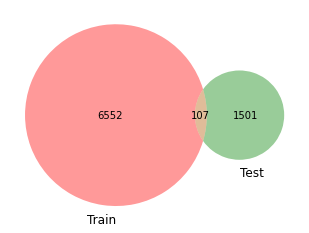

In [ ]:
#checking number of data points common in train and test set

#https://stackoverflow.com/questions/37725099/plot-venn-diagram-with-pandas-and-matplotlib-venn

set1 = set(ogling_train.Description)
set2 = set(ogling_test.Description)

set_array = []

set_array.append(set1)
set_array.append(set2)

venn2([set1, set2], ('Train', 'Test')) # venn2 works for two sets

plt.show()

<font color = red> **Interpretation** </font>
> There is only a small fraction of overlap of data between train and test dataset. The test dataset is a good to check how well the model works on unseen data

Number of duplicated entries in train dataset :  500


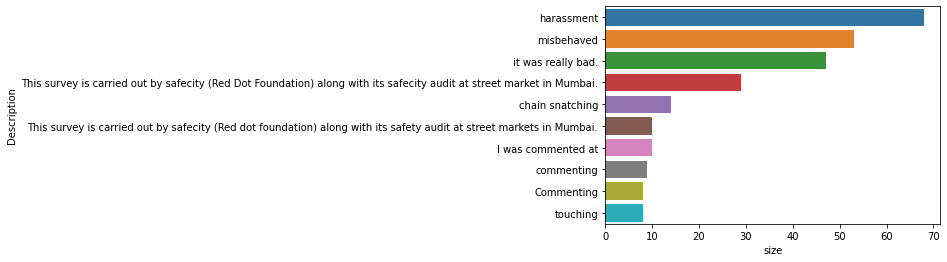

In [ ]:
train_duplicate = ogling_train[ogling_train.duplicated()]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['Description'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  165


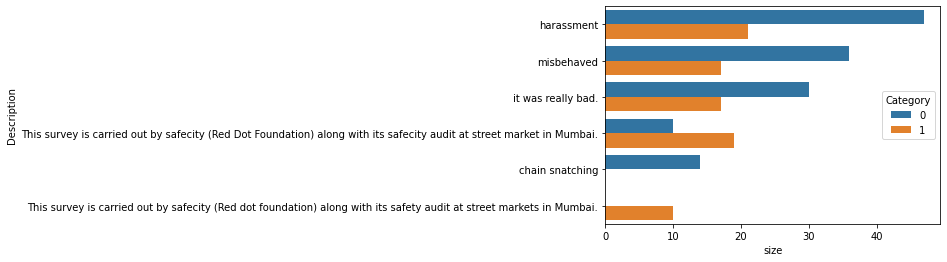

In [ ]:
train_dup_count_class = train_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['Description'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : ogling and ogling. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

Number of duplicated entries in test dataset :  81


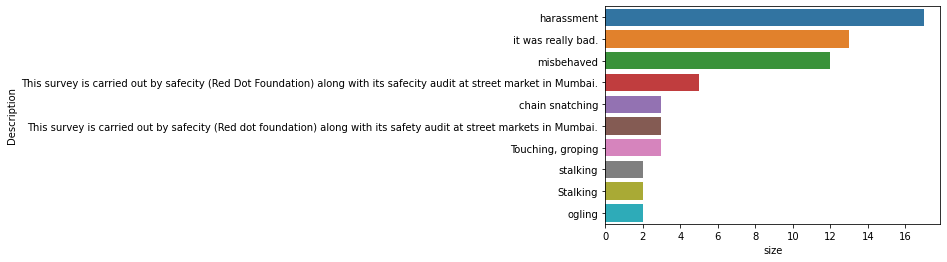

In [ ]:
test_duplicate = ogling_test[ogling_test.duplicated()]
print("Number of duplicated entries in test dataset : ", len(test_duplicate))

test_dup_count = test_duplicate.groupby(['Description'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)

sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['Description'][:10])

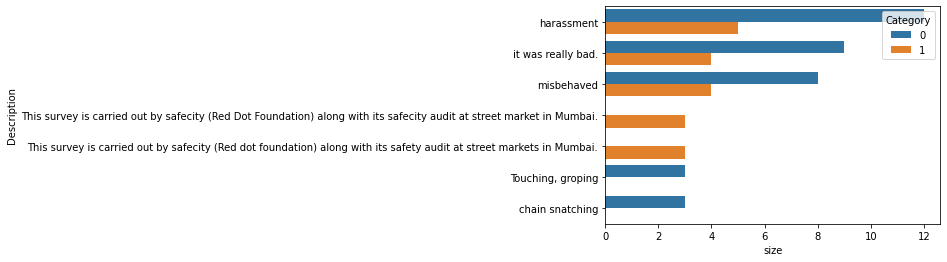

In [ ]:
test_dup_count_class = test_duplicate.groupby(['Description' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['Description'][:10] , hue = test_dup_count_class['Category'][:10])

<font color = red> **Interpretation** </font>
> 1. The texts needs to be pre-processed before removing duplicates as the same texts are present in capitals and small letter. If duplicates are removed now, then after pre-processing also duplicates would need to be removed
Ex : ogling and ogling. Before pre-processing these two words are considered different with duplicates present. after pre-processing they would result in the same word and result in duplication again
> 2. In a binary classification task, a text can either be present in one of the classes and not in both. These is also taken care after pre-processing the data 

#### **Feature Engineering**

In [142]:
#lower case
def to_lower(x):
  return x.lower()

In [143]:
ogling_train['lower'] = ogling_train['Description'].apply(to_lower)
ogling_test['lower'] = ogling_test['Description'].apply(to_lower)

#displaying train dataset
ogling_train.head()

,Description,Category,lower
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums..."
1,This incident took place in the evening.I was ...,1,this incident took place in the evening.i was ...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0,i was waiting for the bus. a man came on a bik...
3,Incident happened inside the train,0,incident happened inside the train
4,I witnessed an incident when a chain was bruta...,0,i witnessed an incident when a chain was bruta...


In [144]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
"'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had",
"he'd've": "he would have", "he'll": "he shall", "he'll've": "he shall have", "he's": "he has",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has",
"I'd": "I had", "I'd've": "I would have", "I'll": "I shall", "I'll've": "I shall have",
"I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it shall", "it'll've": "it shall have", "it's": "it has",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
"mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
"shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she shall",
"she'll've": "she shall have", "she's": "she has", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would",
"that'd've": "that would have", "that's": "that has", "there'd": "there had", "there'd've": "there would have",
"there's": "there has", "they'd": "they had", "they'd've": "they would have", "they'll": "they shall",
"they'll've": "they shall have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we had", "we'd've": "we would have", "we'll": "we will",
"we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what shall", "what'll've": "what shall have", "what're": "what are", "what's": "what has",
"what've": "what have", "when's": "when has", "when've": "when have", "where'd": "where did",
"where's": "where has", "where've": "where have", "who'll": "who shall", "who'll've": "who shall have",
"who's": "who has", "who've": "who have", "why's": "why has", "why've": "why have",
"will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
"you'd": "you had", "you'd've": "you would have", "you'll": "you shall", "you'll've": "you shall have",
"you're": "you are", "you've": "you have"
}

In [145]:
#expand contractions

def expand_con(x):
  expanded = []
  words = x.split(" ")
  for index, word in enumerate(words) :
    if word in contractions:
      words[index] = contractions[word]
    

  return  ' '.join(words)

In [146]:
ogling_train['expand'] = ogling_train['lower'].apply(expand_con)
ogling_test['expand'] = ogling_test['lower'].apply(expand_con)

#displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums..."


In [147]:
#removing all characters except alphanumeric 

def clean_text(x):
    pattern = r'[^a-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

In [148]:
ogling_train['clean_text'] = ogling_train['expand'].apply(clean_text)
ogling_test['clean_text'] = ogling_test['expand'].apply(clean_text)

#displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand,clean_text
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...


In [149]:
#adding space between a number and character
#40yers - 40 yrs
#3pm - 3 pm

def split_num_alpha(x):
  regex = r"(?i)(?<=\d)(?=[a-z])|(?<=[a-z])(?=\d)"
  text = re.sub(regex, " ", x, 0)
  if text:
      return text
  else:
      return x

In [150]:
ogling_train['split_num_alpha'] = ogling_train['clean_text'].apply(split_num_alpha)
ogling_test['split_num_alpha'] = ogling_test['clean_text'].apply(split_num_alpha)

#displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...


In [151]:
#removing stop words

# set of stop words
stop_words = set(stopwords.words('english')) 

def remove_stop_words(x): 
  # tokens of words  
  word_tokens = word_tokenize(x) 
    
  filtered_sentence = [] 
  
  for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

  return " ".join(filtered_sentence)


In [152]:
ogling_train['remove_stop_words'] = ogling_train['split_num_alpha'].apply(remove_stop_words)
ogling_test['remove_stop_words'] = ogling_test['split_num_alpha'].apply(remove_stop_words)

#displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...


In [153]:
def lem(x):

  lem_l = []

  doc = nlp(x)
  for token in doc:
    tl = token.lemma_
    if tl == '-PRON-':
      continue
    else:
      lem_l.append(tl)
  
  lem_sen = ' '.join([i for i in lem_l]) 

  return lem_sen


In [154]:
ogling_train['lem'] = ogling_train['remove_stop_words'].apply(lem)
ogling_test['lem'] = ogling_test['remove_stop_words'].apply(lem)

In [155]:
ogling_train.head(2)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...
1,This incident took place in the evening.I was ...,1,this incident took place in the evening.i was ...,this incident took place in the evening.i was ...,this incident took place in the eveningi was i...,this incident took place in the eveningi was i...,incident took place eveningi metro two guys st...,incident take place eveningi metro two guy sta...


Number of duplicated entries in train dataset :  692


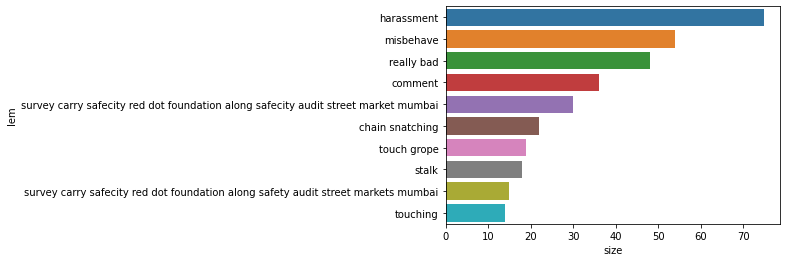

In [156]:
#displaying the duplicate entries after pre-processing

train_duplicate = ogling_train[ogling_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  228


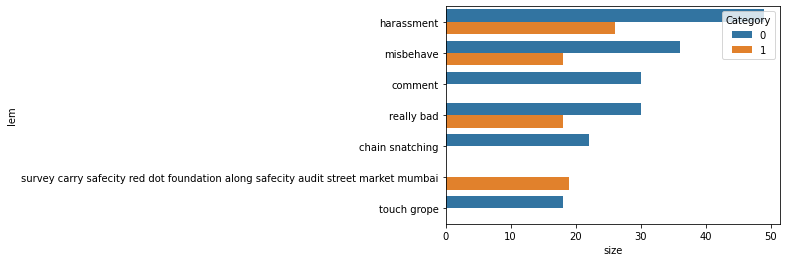

In [157]:
train_dup_count_class = train_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class))

sns.barplot(x = train_dup_count_class['size'][:10] , y = train_dup_count_class['lem'][:10] , hue = train_dup_count_class['Category'][:10])
plt.tight_layout()

In [158]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = train_dup_count_class['size'].tolist()
cat = train_dup_count_class['Category'].tolist()
desc = train_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

train_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  195


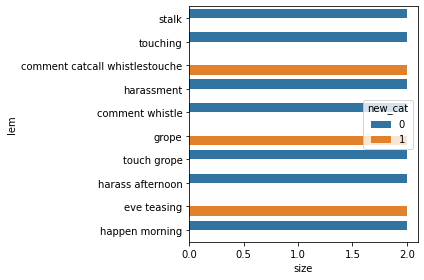

In [159]:
train_dup_count_class_ = train_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(train_dup_count_class_))

sns.barplot(x = train_dup_count_class_['size'][:10] , y = train_dup_count_class_['lem'][:10] , hue = train_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [160]:
#changing the class label of those texts belonging
#to both classes

dup_desc = train_dup_count_class_.lem.tolist()
train_desc = ogling_train.lem.tolist()

train_cat = ogling_train.Category.tolist()
dup_cat = train_dup_count_class_.new_cat.tolist()

for i in range(len(train_desc)):
  td = train_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     train_cat[i] = dup_cat[j]

ogling_train.Category = train_cat

Number of duplicated entries in train dataset :  692


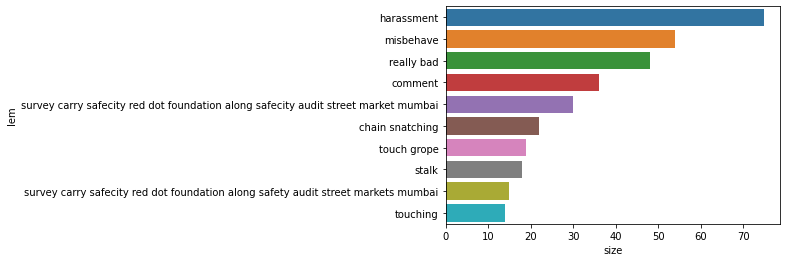

In [161]:
train_duplicate = ogling_train[ogling_train.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(train_duplicate))


train_dup_count = train_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = train_dup_count['size'][:10] , y = train_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  126


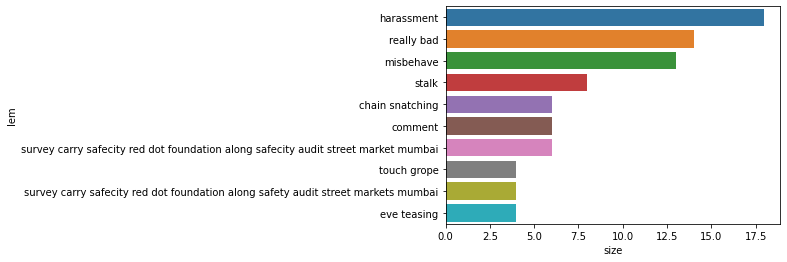

In [162]:
test_duplicate = ogling_test[ogling_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

Number of duplicated entries in train dataset :  50


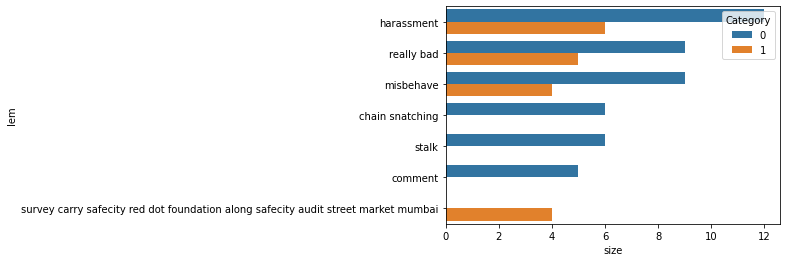

In [163]:
test_dup_count_class = test_duplicate.groupby(['lem' , 'Category'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class))

sns.barplot(x = test_dup_count_class['size'][:10] , y = test_dup_count_class['lem'][:10] , hue = test_dup_count_class['Category'][:10])
plt.tight_layout()

In [164]:
#Since a text  can belong along to one class
#Replacing the class of the text by the class
#it has a higher count
#Ex : harrasmment : class 0 has 5 duplicates
#     harrasment : class 1 has 10 duplicates
#Replace all harrasment class to 1

#later on the duplicate entries will be removed
#This way harrasment belonging to class 1 remains
#and harrasment belonging to class 0 is removed

count = test_dup_count_class['size'].tolist()
cat = test_dup_count_class['Category'].tolist()
desc = test_dup_count_class['lem'].tolist()

for i in range(len(cat)):
  text = desc[i]
  for j in range(len(cat)):
    text1 = desc[j]

    if text == text1:
      text_count = count[i]
      text_count1 = count[j]

      if text_count > text_count1:
        cat[i] = cat[i]
      else:
        cat[i] = cat[j]

test_dup_count_class['new_cat'] = cat

Number of duplicated entries in train dataset :  39


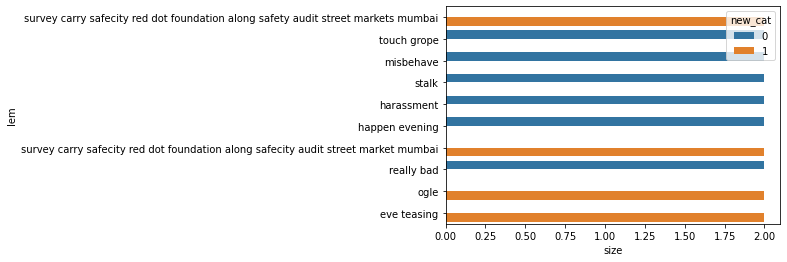

In [165]:
test_dup_count_class_ = test_dup_count_class.groupby(['lem' , 'new_cat'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of duplicated entries in train dataset : ", len(test_dup_count_class_))

sns.barplot(x = test_dup_count_class_['size'][:10] , y = test_dup_count_class_['lem'][:10] , hue = test_dup_count_class_['new_cat'][:10])
plt.tight_layout()

In [166]:
#changing the class label of those texts belonging
#to both classes

dup_desc = test_dup_count_class_.lem.tolist()
test_desc = ogling_test.lem.tolist()

test_cat = ogling_test.Category.tolist()
dup_cat = test_dup_count_class_.new_cat.tolist()

for i in range(len(test_desc)):
  td = test_desc[i]
  for j in range(len(dup_desc)):
    dd = dup_desc[j]
    if td == dd:
     test_cat[i] = dup_cat[j]

ogling_test.Category = test_cat

Number of duplicated entries in train dataset :  126


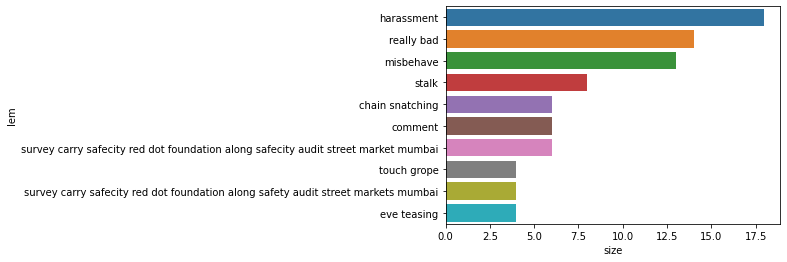

In [167]:
test_duplicate = ogling_test[ogling_test.duplicated(['lem'])]
print("Number of duplicated entries in train dataset : ", len(test_duplicate))


test_dup_count = test_duplicate.groupby(['lem'] , dropna=False, as_index=False).size().sort_values("size" , ascending = False)
sns.barplot(x = test_dup_count['size'][:10] , y = test_dup_count['lem'][:10])
plt.tight_layout()

In [168]:
def numb_words(x):
  words = x.split(" ")
  return len(words)

In [169]:
ogling_train['desc_words'] = ogling_train['lem'].apply(numb_words)
ogling_test['desc_words'] = ogling_test['lem'].apply(numb_words)

#displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21


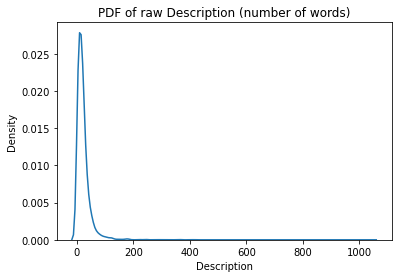

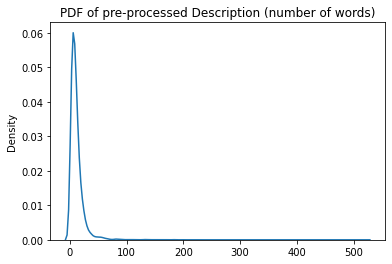

In [170]:
#distribution of description length before and after preprocessing

before = ogling_train['Description'].apply(numb_words)
after = ogling_train['desc_words'].values

sns.kdeplot(before)
plt.title("PDF of raw Description (number of words)")
plt.show()

sns.kdeplot(after)
plt.title("PDF of pre-processed Description (number of words)")
plt.show()

<font color = red> **Interpretation** </font>
> After pre-processing the text data, there is a reduction in the number of words per text

In [171]:
#getting parts of speech

pos_re = {"noun":re.compile('N.*'), "verb":re.compile('V.*'),
          "adverb":re.compile('R.*'), "adjective":re.compile('J.*'),
          "pronoun":re.compile('J.*')}
def count_POS(text, part_of_speech):
  count = 0
  for word, pos in nltk.pos_tag(word_tokenize(text)):
    if re.match(pos_re[part_of_speech],pos):
      count += 1
  return count

ogling_train["noun_count"] = ogling_train["Description"].apply(lambda x: count_POS(x,"noun"))
ogling_train["pronoun_count"] = ogling_train["Description"].apply(lambda x: count_POS(x,"pronoun"))
ogling_train["verb_count"] = ogling_train["Description"].apply(lambda x: count_POS(x,"verb"))
ogling_train["adverb_count"] = ogling_train["Description"].apply(lambda x: count_POS(x,"adverb"))
ogling_train["adjective_count"] = ogling_train["Description"].apply(lambda x: count_POS(x,"adjective"))


ogling_test["noun_count"] = ogling_test["Description"].apply(lambda x: count_POS(x,"noun"))
ogling_test["pronoun_count"] = ogling_test["Description"].apply(lambda x: count_POS(x,"pronoun"))
ogling_test["verb_count"] = ogling_test["Description"].apply(lambda x: count_POS(x,"verb"))
ogling_test["adverb_count"] = ogling_test["Description"].apply(lambda x: count_POS(x,"adverb"))
ogling_test["adjective_count"] = ogling_test["Description"].apply(lambda x: count_POS(x,"adjective"))

In [172]:
ogling_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2


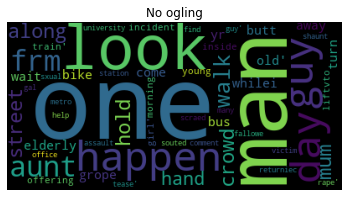

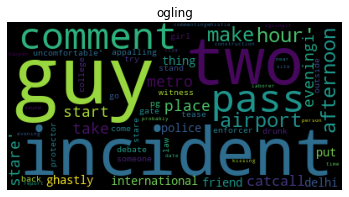

In [173]:
#displaying word cloud of train data 
text_0 = ogling_train[ogling_train['Category'] == 0]['lem'].values
text_1 = ogling_train[ogling_train['Category'] == 1]['lem'].values


wordcloud = WordCloud().generate(str(text_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("No ogling")
plt.show()


wordcloud = WordCloud().generate(str(text_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ogling")
plt.show()

In [174]:
def sentiment(x):
  word_sent = TextBlob(x).sentiment
  return word_sent.polarity,word_sent.subjectivity

In [175]:
#from itertools import zip
ogling_train['polarity'], ogling_train['subjectivity'] = zip(*ogling_train['Description'].apply(sentiment))
ogling_test['polarity'], ogling_test['subjectivity'] = zip(*ogling_test['Description'].apply(sentiment))

#Displaying train dataset
ogling_train.head(1)

,Description,Category,lower,expand,clean_text,split_num_alpha,remove_stop_words,lem,desc_words,noun_count,pronoun_count,verb_count,adverb_count,adjective_count,polarity,subjectivity
0,"Was walking along crowded street, holding mums...",0,"was walking along crowded street, holding mums...","was walking along crowded street, holding mums...",was walking along crowded street holding mums ...,was walking along crowded street holding mums ...,walking along crowded street holding mums hand...,walk along crowd street hold mum hand elderly ...,21,8,2,9,5,2,0.1,0.2


In [176]:
ogling_train.drop_duplicates(inplace = True)
ogling_test.drop_duplicates(inplace = True)

In [177]:
scale = StandardScaler()

desc_words = np.array(ogling_train.desc_words.values).reshape(-1,1)
desc_wordst = np.array(ogling_test.desc_words.values).reshape(-1,1)

scale_desc_words = scale.fit(desc_words)
scale_desc_words_train = scale.transform(desc_words)
scale_desc_words_test = scale.transform(desc_wordst)

#--------------------------------------------------------------------

noun_count = np.array(ogling_train.noun_count).reshape(-1,1)
noun_countt = np.array(ogling_test.noun_count).reshape(-1,1)

scale_desc_words = scale.fit(noun_count)
scale_noun_count_train = scale.transform(noun_count)
scale_noun_count_test = scale.transform(noun_countt)

#--------------------------------------------------------------------

pronoun_count	= np.array(ogling_train.pronoun_count).reshape(-1,1)
pronoun_countt	= np.array(ogling_test.pronoun_count).reshape(-1,1)

scale_pronoun_count = scale.fit(pronoun_count)
scale_pronoun_count_train = scale.transform(pronoun_count)
scale_pronoun_count_test = scale.transform(pronoun_countt)

#--------------------------------------------------------------------

verb_count	= np.array(ogling_train.verb_count).reshape(-1,1)
verb_countt	= np.array(ogling_test.verb_count).reshape(-1,1)

scale_verb_count = scale.fit(verb_count)
scale_verb_count_train = scale.transform(verb_count)
scale_verb_count_test = scale.transform(verb_countt)

#--------------------------------------------------------------------

adverb_count	= np.array(ogling_train.adverb_count).reshape(-1,1)
adverb_countt	= np.array(ogling_test.adverb_count).reshape(-1,1)

scale_adverb_count = scale.fit(adverb_count)
scale_adverb_count_train = scale.transform(adverb_count)
scale_adverb_count_test = scale.transform(adverb_countt)

#--------------------------------------------------------------------

adjective_count	= np.array(ogling_train.adjective_count).reshape(-1,1)
adjective_countt	= np.array(ogling_test.adjective_count).reshape(-1,1)

scale_adjective_count = scale.fit(adjective_count)
scale_adjective_count_train = scale.transform(adjective_count)
scale_adjective_count_test = scale.transform(adjective_countt)

#--------------------------------------------------------------------

polarity	= np.array(ogling_train.polarity).reshape(-1,1)
polarityt	= np.array(ogling_test.polarity).reshape(-1,1)

scale_polarity = scale.fit(polarity)
scale_polarity_train = scale.transform(polarity)
scale_polarity_test = scale.transform(polarityt)

#--------------------------------------------------------------------

subjectivity = np.array(ogling_train.subjectivity).reshape(-1,1)
subjectivityt = np.array(ogling_test.subjectivity).reshape(-1,1)

scale_subjectivity = scale.fit(subjectivity)
scale_subjectivity_train = scale.transform(subjectivity)
scale_subjectivity_test = scale.transform(subjectivityt)

#--------------------------------------------------------------------

In [178]:
#reading glove_vectors file from drive
with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [179]:
#TFIDF representation of essay

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(ogling_train['lem'].values)  #creates the vocabulary list from the train set

#representing essay in train and test set using the vocabulary list
x_train_essay_tfidf = tfidf_vectorizer.transform(ogling_train['lem'].values)
x_test_essay_tfidf = tfidf_vectorizer.transform(ogling_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_essay_tfidf.shape[1])
print("\nTest set: ", x_test_essay_tfidf.shape[1])

Dimension of essay after vectorizing

Train set:  8745

Test set:  8745


In [180]:
#TFIDF-W2V represntation of essay

dictionary = dict(zip(tfidf_vectorizer.get_feature_names(), list(tfidf_vectorizer.idf_))) #stores word as key ans its tfidf value as value
tfidf_words = set(tfidf_vectorizer.get_feature_names()) #gets the unique words  

# tfidf Word2Vec
# compute tfidf word2vec for each essay 
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ogling_train['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)


tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ogling_test['lem']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test = np.array(tfidf_w2v_vectors_test)

100%|██████████| 1608/1608 [00:00<00:00, 8543.16it/s]


In [181]:
#TFIDF ngram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4))
tfidf_vectorizer.fit(ogling_train['lem'].values)

#representing essay in train and test set using the vocabulary list
x_train_tfidf = tfidf_vectorizer.transform(ogling_train['lem'].values)
x_test_tfidf = tfidf_vectorizer.transform(ogling_test['lem'].values)

#dimension of essay after vectorizing 
print("Dimension of essay after vectorizing")
print("\nTrain set: ", x_train_tfidf.shape)
print("\nTest set: ", x_test_tfidf.shape)

Dimension of essay after vectorizing

Train set:  (6659, 176722)

Test set:  (1608, 176722)


In [182]:
#train and test features

tfidf_features = hstack((x_train_tfidf , tfidf_w2v_vectors_train , scale_desc_words_train ,	scale_noun_count_train , scale_pronoun_count_train ,
                      scale_verb_count_train ,	scale_adverb_count_train ,	scale_adjective_count_train ,
                      	scale_polarity_train ,	scale_subjectivity_train )).tocsr()


tfidf_featurest = hstack((x_test_tfidf , tfidf_w2v_vectors_test , scale_desc_words_test ,	scale_noun_count_test , scale_pronoun_count_test ,
                      scale_verb_count_test ,	scale_adverb_count_test ,	scale_adjective_count_test ,
                      	scale_polarity_test ,	scale_subjectivity_test )).tocsr()
                       
print("Shape of train features : ", tfidf_features.shape)
print("Shape of test features : ", tfidf_featurest.shape)                       

Shape of train features :  (6659, 177030)
Shape of test features :  (1608, 177030)


In [183]:
target = ogling_train.Category
targett = ogling_test.Category

#### **Hyper-parameter Tunning & Training**

In [184]:
dt = DecisionTreeClassifier( random_state = 42 , class_weight = "balanced")

#hyperparameter tunning
prams={ 'max_depth':[3,5,10],
       'min_samples_split' : [25,50,75,100,150,200]
       }

print("5- fold CV Progress : \n ")
search=RandomizedSearchCV(dt, param_distributions=prams, verbose=10, n_jobs=-1 , scoring = 'accuracy' , random_state = 42)

result = search.fit(tfidf_features, target)

print("\n\nOptimum parameter values :")
result.best_params_

5- fold CV Progress : 
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Optimum parameter values :


{'max_depth': 3, 'min_samples_split': 200}

In [185]:
#best model
best_model = DecisionTreeClassifier(random_state = 42 , class_weight = "balanced" , 
                                    max_depth = 3 , min_samples_split = 200
                               )

best_model.fit(tfidf_features, target)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=200, random_state=42)

In [186]:
#prediction
train_pred = best_model.predict(tfidf_features)
test_pred = best_model.predict(tfidf_featurest)


#### **Performance Metrics**

Train set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

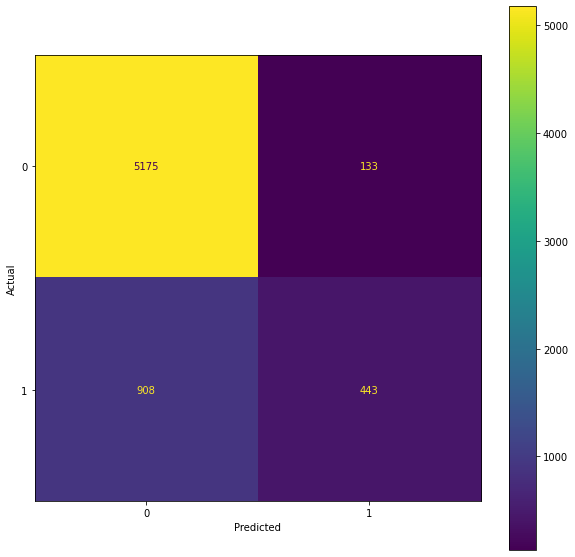

In [187]:
#train
print("Train set Confusion Matrix")
cm = confusion_matrix(target , train_pred )
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Not ogling','ogling']

cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

Test set Confusion Matrix


[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

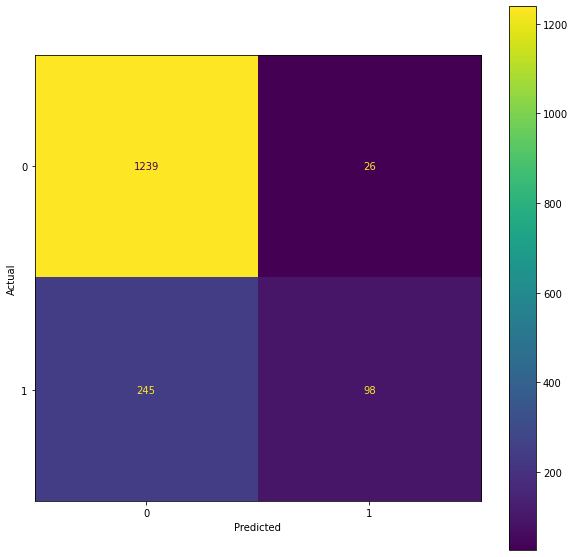

In [188]:
#test
print("Test set Confusion Matrix")
cm = confusion_matrix(targett , test_pred )
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Not ogling','ogling']

cmd = ConfusionMatrixDisplay(cm)

cmd.plot(ax=ax)
cmd.ax_.set(xlabel = "Predicted" , ylabel = "Actual")

In [189]:
#performance metric used in the paper
train_acc = accuracy_score(target , train_pred )
test_acc = accuracy_score(targett , test_pred )
print("Performance Metric used in the paper : Accuracy\n")
print("Train Accuracy : ", train_acc)
print("Test Accuracy : ", test_acc ,"\n")

print("-"*50)

train_f1 = f1_score(target , train_pred )
test_f1 = f1_score(targett , test_pred )
print("\nTrain F1 score :",train_f1 )
print("Test F1 score :",test_f1 )

Performance Metric used in the paper : Accuracy

Train Accuracy :  0.843670220753867
Test Accuracy :  0.8314676616915423 

--------------------------------------------------

Train F1 score : 0.459782044628957
Test F1 score : 0.4197002141327622
